# **Credit Risk Modeling - Preprocessing**

### **Context and Objective:**  
In this project we'll be building various models to measure credit risk for a bank in the United States. Credit risk is a very sensitive topic and it is important for the financial health of creditors. Therefore, I spent a considerable amount of time looking for the best practices there is to predict the probability of default. Here, I followed the rules established by the Basel II and Basel III Accords which means that everything is done exactly as it is performed in banks. I took advantage of techniques like fine classing, coarse classing, weight of evidence, and information value which I believe their use is one of the most important determinants of the success of the model. 

Three different models are built:   
- PD (Probabililty of Default) showing the probability of a customer not repaying their debt.  
- LGD (Loss Given Default) showing the proportion of an exposure a company loses when a customer defaults.
- EAD (Exposure at Default) showing the total loss in terms of amount of money the bank is exposed to if a customer defaults.  

With this information, a scorecard identical to the ones bank officers use on a daily basis to accept or reject loan applications is created.

Finally, the three models are combined to calculate the total expected loss for the whole portfolio of loans that the bank holds. 

Credit risk models need adjustments from time to time. So a particular focus was given to maintaining credit risk models and deploying them for direct use. 

### **Dataset:**  
The dataset used contains all available data for more than 800,000 consumer loans issued from 2007 and 2015 by a large U.S. peer to peer lending company named LendingClub. There are several versions of this dataset. I have used a dataset available on www.kaggle.com. 

**Note:** This code was written on Jupyter Notebook.  
**Programming language:** Python.  
**Packages:** numpy, pandas, sklearn, scipy, matplotlib, seaborn.

### **Import the relevant libraries**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Load and explore the dataset**

In [2]:
# the dataset is called: "loan_data_2007_2014.csv"containing data from 2007 to 2014
# let's load the "loan_data_2007_2014.csv" dataset
loan_data_2007_2014 = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_2007_2014.csv') # read the csv file
pd.options.display.max_columns = None # set the maximum number of columns to dispalay to none 
loan_data_2007_2014.head() # diplay the first five rows

C:\Users\Aylan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [3]:
# print the shape of the dataset
print('Shape of "loan_data_2007_2014" dataset: {}'.format(loan_data_2007_2014.shape))

# verify the column names
print('\nColumn names of the "loan_data_2007_2014" dataset:\n{}'.format(loan_data_2007_2014.columns))

Shape of "loan_data_2007_2014" dataset: (466285, 75)

Column names of the "loan_data_2007_2014" dataset:
Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_maj

### **Dataset description:**  
- The dataset contains information about consumer loans from 2007 and 2014 with a total of 466,285 consumer loans.  
- After carefully observing the data, here's a quick description of the most significant columns: the first two columns are "id" and "member_id", then we have information about the funded amount, the term of the loans and the interest rate. What follows is some information about the lender. The grade columns describes the external credit agency grade given as letters from A to G. There is also the employment length of the borrower, their home ownership status and their annual income. In addition, one of the most important columns is the status of the loan because it indicates whether the borrowers defaulted or not. We can that some loans are fully paid while others are charged off. Next, there is some information about the purpose of the loan, the address of the borrower and their debt to income ratio. We could say these are the most important piece of information we can use for this work. 

### **Preprocessing**

#### Preprocessing continuous variables

In [4]:
# print some relevant information on the dataset with the df.info() method
loan_data_2007_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
# let's make sure our continuous variables are numeric
# going through the list with variable types we can see that the term and employment length variables are not numeric, they are rather objects 
# print the the unique values of the "emp_length" column
loan_data_2007_2014['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [6]:
# we have values "more than 10 years", "less than 1 year", and then all the values from 1-9 years 
# we have some missing values too
# the values are sorted as text because they have the word "years" at the end of each
# so, to turn most of these values into integer, we need to get rid of the years string
# we also need to get rid of the following characters: "+", "<", " year"
# the following lines of code will remove the mentionned characters using the str.replace() method and assign the result to a new variable named "emp_length_int"
loan_data_2007_2014['emp_length_int'] = loan_data_2007_2014['emp_length'].str.replace('\+ years', '')  
loan_data_2007_2014['emp_length_int'] = loan_data_2007_2014['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_2007_2014['emp_length_int'] = loan_data_2007_2014['emp_length_int'].str.replace('n/a', str(0))
loan_data_2007_2014['emp_length_int'] = loan_data_2007_2014['emp_length_int'].str.replace(' years', '')
loan_data_2007_2014['emp_length_int'] = loan_data_2007_2014['emp_length_int'].str.replace(' year', '')

# check the type of the new column
loan_data_2007_2014['emp_length_int'].dtype

dtype('O')

In [7]:
# convert the new column to numeric type 
loan_data_2007_2014['emp_length_int'] = pd.to_numeric(loan_data_2007_2014['emp_length_int'])

# check again the type of the new column
loan_data_2007_2014['emp_length_int'].dtype

dtype('float64')

In [8]:
# check the new column
loan_data_2007_2014.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [9]:
# print the the unique values of the new "emp_length_int" column
loan_data_2007_2014['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [10]:
# print the the unique values of the "emp_length" column
loan_data_2007_2014['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
# we have values " 36 months", " 60 months", and then all the values from 1-9 years 
# the values are sorted as text because they have the word "months" at the end of each
# so, to turn most of these values into integer, we need to get rid of the months string
# the following lines of code will remove the mentionned characters using the str.replace() method and assign the result to a new variable named "term_int"
loan_data_2007_2014['term_int'] = loan_data_2007_2014['term'].str.replace(' months', '')  

# check type of the new column
loan_data_2007_2014['term_int'].dtype

dtype('O')

In [12]:
# convert the new column to numeric type 
loan_data_2007_2014['term_int'] = pd.to_numeric(loan_data_2007_2014['term_int'])

In [13]:
# print the the unique values of the new "term_int" column
loan_data_2007_2014['term_int'].unique()

array([36, 60], dtype=int64)

In [14]:
# check again type of the new column
loan_data_2007_2014['term_int'].dtype

dtype('int64')

In [15]:
# next, let's process the "earliest_cr_line" and "issued_d" columns
# these variables are strings but they are actually supposed to be date variables
# what we can do with them is to calculate the time that has passed since each of these events,
# time since the earliest credit line was issued and time since the loan was issued
# first we will calculate the number of months since the earliest credit line was issued, and then we'll calculate the number of months since the loan was issued
# let's begin by examining the "earliest_cr_line" variable
loan_data_2007_2014['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [16]:
# we can see that this variable contains information composed of three letters descripbing a month followed by a hyphen, followed by the last two digits of the year
# we need to turn these strings to timestamps and save the result in a new column
loan_data_2007_2014['earliest_cr_line_date'] = pd.to_datetime(loan_data_2007_2014['earliest_cr_line'], format = '%b-%y')

# to calculate the time that has passed we need to to set a reference date 
# I took "december 1st, 2017 as a reference date, we can also take today's date if we want
# first we caculate the number of days between the reference date and earliest credit line date
n_day = pd.to_datetime('2017-12-1') - loan_data_2007_2014['earliest_cr_line_date']

# next, we will use this result to calculate the difference in months
loan_data_2007_2014['mth_since_earliest_cr_line'] = round(n_day / np.timedelta64(1, 'M'))

# let's analyze this column with the df.describe() method and explore what's inside
loan_data_2007_2014['mth_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mth_since_earliest_cr_line, dtype: float64

In [17]:
# the descriptive statistics show that everything is normal except for the min value which is negative
# it's impossible to have a negative time difference between the time in the future and the time in the past
# we need to further explore and solve this issue
# we can display the data points where the negative time differences were calculated 
# to do that, we select all the data points where the "mth_since_earliest_cr_line" < 0
loan_data_2007_2014.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mth_since_earliest_cr_line']][loan_data_2007_2014['mth_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mth_since_earliest_cr_line
1580             Sep-62            2062-09-01                      -537.0
1770             Sep-68            2068-09-01                      -609.0
2799             Sep-64            2064-09-01                      -561.0
3282             Sep-67            2067-09-01                      -597.0
3359             Feb-65            2065-02-01                      -566.0
...                 ...                   ...                         ...
464003           Jan-68            2068-01-01                      -601.0
464260           Jul-66            2066-07-01                      -583.0
465100           Oct-67            2067-10-01                      -598.0
465500           Sep-67            2067-09-01                      -597.0
465655           Jan-56            2056-01-01                      -457.0

[1169 rows x 3 columns]

In [18]:
# it seems that the "mth_since_earliest_cr_line" column contains many negative time differences
# this is because the "earliest_cr_line_date" is way into the future after the year 2060
# I think that what has happend is when we were turning strings into dates that with the number 60 (or more) were not interpreted correctly,
# and turned into year 2060 (or more) instead of 1960 (ore more)
# this is still a hypothesis because I didn't check all the rows
# I think the issues arose most likely because the origin of the built-in time scale starts after 1970
# the best way to solve this problem is turn the 2060 dates into 1960 dates and recalculate the difference
# however this process can be difficult and time consuming 
# since this problem concerns only 1169 rows out of more than 466,000 rows we can remove them and I don't think this will impact our results
# but there is a better solution by imputing the negative values by the maximum observed value
# I chose the max value because most of the dates in the "earliest_cr_line_date" column are in the 1960s so the difference in time would be among the highest
loan_data_2007_2014['mth_since_earliest_cr_line'][loan_data_2007_2014['mth_since_earliest_cr_line'] < 0] = loan_data_2007_2014['mth_since_earliest_cr_line'].max()

# run the df.describe() method again to check the results
loan_data_2007_2014['mth_since_earliest_cr_line'].describe()

<ipython-input-18-ae30bdab67c1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_2007_2014['mth_since_earliest_cr_line'][loan_data_2007_2014['mth_since_earliest_cr_line'] < 0] = loan_data_2007_2014['mth_since_earliest_cr_line'].max()


count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mth_since_earliest_cr_line, dtype: float64

In [19]:
# the minimum value is now 73
# let's examine the "issue_d" and do the same processing
loan_data_2007_2014['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [20]:
# we can see that this variable contains information composed of three letters descripbing a month followed by a hyphen, followed by the last two digits of the year
# we need to turn these strings to timestamps and save the result in a new column
loan_data_2007_2014['issue_date'] = pd.to_datetime(loan_data_2007_2014['issue_d'], format = '%b-%y')

# to calculate the time that has passed we need to set a reference date 
# I took "december 1st, 2017 as a reference date, we can also take today's date if we want
# first we caculate the number of days between the reference date and earliest credit line date
n_day = pd.to_datetime('2017-12-1') - loan_data_2007_2014['issue_date']

# next, we will use this result to calculate the difference in months
loan_data_2007_2014['mth_issue_date'] = round(n_day / np.timedelta64(1, 'M'))

# let's analyze this column with the df.describe() method and explore what's inside
loan_data_2007_2014['mth_issue_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mth_issue_date, dtype: float64

#### Preprocessing discrete variables  
In this part of our work, we will preprocess some discrete features.

In [21]:
# explore the features with df.info() method
loan_data_2007_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [22]:
# after exploring the features, I decided to focus on these discrete variables:
# "grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state", "initial_list_status"
# what we'll do is to create dummy variables for all categories of the discrete features
# it's worth mentioning that we only need k-1 dummy variables to represent the information about k categories
loan_dummies = [pd.get_dummies(data = loan_data_2007_2014['grade'], prefix = 'grade', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['purpose'], prefix = 'purpose', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                pd.get_dummies(data = loan_data_2007_2014['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

# convert loan_dummies to a dataframe
loan_dummies = pd.concat(loan_dummies, axis = 1)

# concatenate the loan_dummies dataframe with the original dataframe
loan_data_2007_2014 = pd.concat([loan_data_2007_2014, loan_dummies], axis = 1)

# display the concatenated dataframe
loan_data_2007_2014.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

#### Check for missing values

In [23]:
# let's check for missing values with the df.isnull() method
pd.options.display.max_rows = None
loan_data_2007_2014.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [24]:
# we can see that many columns have missing values
# let's impute the missing values for the variables we are going to use for our model

# replace the missing values in the "total_rev_hi_lim" with the corresponding values in the "funded_amnt" column
loan_data_2007_2014['total_rev_hi_lim'].fillna(loan_data_2007_2014['funded_amnt'], inplace = True)

# replace the missing values in the "annual_inc" with the mean of the same column
loan_data_2007_2014['annual_inc'].fillna(loan_data_2007_2014['annual_inc'].mean(), inplace = True)

# replace the missing values with zeroes for the following columns: 
# "mths_since_earliest_cr_line", "acc_now_delinq", "total_acc", "pub_rec", "open_acc", "inq_last_6mths", "delinq_2yrs", "emp_length_int"
loan_data_2007_2014['mth_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data_2007_2014['acc_now_delinq'].fillna(0, inplace = True)
loan_data_2007_2014['total_acc'].fillna(0, inplace = True)
loan_data_2007_2014['pub_rec'].fillna(0, inplace = True)
loan_data_2007_2014['open_acc'].fillna(0, inplace = True)
loan_data_2007_2014['inq_last_6mths'].fillna(0, inplace = True)
loan_data_2007_2014['delinq_2yrs'].fillna(0, inplace = True)
loan_data_2007_2014['emp_length_int'].fillna(0, inplace = True)

### **PD Model**

#### Establishing the dependant variable

In [25]:
# first we need to establish the dependant variable
# we are interested in the borrowers and the respective loanson which they have defaulted or not
# we call loans that have been defaulted bad while we call those which performed well good
# we'll create a dependant variable of a binary type, 0 will stand for default (or bad loan) and 1 will stand for non-default (or good loan)
# to define the dependant variable here, we need to take a look at the information we have in the "loan_status" column
# let's display the unique values of this column
loan_data_2007_2014['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [26]:
# as we can see, the column contains 10 unique values
# obviously, accounts that have been fully paid have not defaulted
# same applies to "Current" and "In Grace Period"
# on the other hand, "Charged Off" accounts have definitely defaulted, therefore they are bad, same goes to status "Default"
# let's use the df.value_counts() method to see how many counts there are for each status
loan_data_2007_2014['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [27]:
# calculate the proportion
loan_data_2007_2014['loan_status'].value_counts(normalize = True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [28]:
# we'll store our good/bad (or defautlt/non-default) flag in a new variable called "good_bad" which will contain only 0s and 1s
# these following statuses will be assigned a 0: "Charged Off", "Default", "Late (16-30 days)", "Does not meet the credit policy. Status:Charged Off"
# these following statuses will be assigned a 1: "Fully Paid", "Current", "Issued", "In Grace Period", "Does not meet the credit policy. Status:Fully Paid"
# to achieve this we can use the np.where() method
loan_data_2007_2014['good_bad'] = np.where(loan_data_2007_2014['loan_status'].isin(['Charged Off', 'Default', 'Late (16-30 days)', 
                                                                                   'Does not meet the credit policy. Status:Charged Off']), 0, 1)

# display the first few rows of the column
loan_data_2007_2014['good_bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int32

#### Establishing the independant variables
To construct the independant variables we only need dummy variables. For discrete variables we can use their categories to create the dummies. However, for continuous variables we need to turn them into categories and use the fine classing process to create the dummies for these variables. 

#### Preparing the data
##### Preprocessing discrete variables

In [29]:
# lets split the dataset into train and test sets
# first we need to define the target and the inputs
inputs = loan_data_2007_2014.drop(['good_bad'], axis = 1)
target = loan_data_2007_2014['good_bad']

# split the data
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

# print shape of the splitted sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(373028, 207)
(93257, 207)
(373028,)
(93257,)


In [30]:
# preprocess the discrete variables
# here I took as an example the "grade" variable
# first we create working dataframes for all the preprocessing
df_inputs_prepr = X_train
df_targets_prepr = y_train

# print the unique values of the "grade" variable
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [31]:
# the "grade" variable contains 7 letters from A to G: A shows the highest credit worthiness and G shows the lowest credit worthiness
# we will calculate the Weight of Evidence and information value of this discrete variable 
# create a dataframe that concatenates the "grade" and the target variables
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head() 

grade  good_bad
427211     A         1
206088     C         1
136020     A         1
412305     D         1
36159      C         0

In [32]:
# calculate the proportion of good and bad borrowers by grade
# first count the number of good and bad borrowers by grade
df_count = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
df_count

grade  good_bad
0     A     59759
1     B    109730
2     C    100245
3     D     61498
4     E     28612
5     F     10530
6     G      2654

In [33]:
# here we calculate the proportion of good borrowers by calculating the mean of "good_bad"
df_prop = df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
df_prop

grade  good_bad
0     A  0.964775
1     B  0.929199
2     C  0.899426
3     D  0.864272
4     E  0.826821
5     F  0.776923
6     G  0.754333

In [34]:
# concatenate the two results into one dataframe
df1 = pd.concat([df_count, df_prop], axis = 1)
df1

grade  good_bad grade  good_bad
0     A     59759     A  0.964775
1     B    109730     B  0.929199
2     C    100245     C  0.899426
3     D     61498     D  0.864272
4     E     28612     E  0.826821
5     F     10530     F  0.776923
6     G      2654     G  0.754333

In [35]:
# remove the the third column which is the same as the first
df1 = df1.iloc[:, [0,1,3]]
df1

grade  good_bad  good_bad
0     A     59759  0.964775
1     B    109730  0.929199
2     C    100245  0.899426
3     D     61498  0.864272
4     E     28612  0.826821
5     F     10530  0.776923
6     G      2654  0.754333

In [36]:
# rename the columns
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade   n_obs  prop_good
0     A   59759   0.964775
1     B  109730   0.929199
2     C  100245   0.899426
3     D   61498   0.864272
4     E   28612   0.826821
5     F   10530   0.776923
6     G    2654   0.754333

In [37]:
# from now on, we will use only these variables to calculate the weight of evidence and information value
# calculate the proprtion of the number of observations
df1['obs_prop'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade   n_obs  prop_good  obs_prop
0     A   59759   0.964775  0.160200
1     B  109730   0.929199  0.294160
2     C  100245   0.899426  0.268733
3     D   61498   0.864272  0.164862
4     E   28612   0.826821  0.076702
5     F   10530   0.776923  0.028228
6     G    2654   0.754333  0.007115

In [38]:
# calculate the number of good and bad borrowers
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade   n_obs  prop_good  obs_prop    n_good    n_bad
0     A   59759   0.964775  0.160200   57654.0   2105.0
1     B  109730   0.929199  0.294160  101961.0   7769.0
2     C  100245   0.899426  0.268733   90163.0  10082.0
3     D   61498   0.864272  0.164862   53151.0   8347.0
4     E   28612   0.826821  0.076702   23657.0   4955.0
5     F   10530   0.776923  0.028228    8181.0   2349.0
6     G    2654   0.754333  0.007115    2002.0    652.0

In [39]:
# calculate the proportion of the number of good borrowers
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
0     A   59759   0.964775  0.160200   57654.0   2105.0     0.171197   
1     B  109730   0.929199  0.294160  101961.0   7769.0     0.302762   
2     C  100245   0.899426  0.268733   90163.0  10082.0     0.267730   
3     D   61498   0.864272  0.164862   53151.0   8347.0     0.157826   
4     E   28612   0.826821  0.076702   23657.0   4955.0     0.070247   
5     F   10530   0.776923  0.028228    8181.0   2349.0     0.024293   
6     G    2654   0.754333  0.007115    2002.0    652.0     0.005945   

   prop_n_bad  
0    0.058055  
1    0.214264  
2    0.278055  
3    0.230205  
4    0.136656  
5    0.064784  
6    0.017982

In [40]:
# calculate the weight of evidence
# it is equal to the natural logarithm of the ratio of the proportion of good borrowers to the proportion of bad borrowers
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
0     A   59759   0.964775  0.160200   57654.0   2105.0     0.171197   
1     B  109730   0.929199  0.294160  101961.0   7769.0     0.302762   
2     C  100245   0.899426  0.268733   90163.0  10082.0     0.267730   
3     D   61498   0.864272  0.164862   53151.0   8347.0     0.157826   
4     E   28612   0.826821  0.076702   23657.0   4955.0     0.070247   
5     F   10530   0.776923  0.028228    8181.0   2349.0     0.024293   
6     G    2654   0.754333  0.007115    2002.0    652.0     0.005945   

   prop_n_bad       WoE  
0    0.058055  1.081435  
1    0.214264  0.345739  
2    0.278055 -0.037842  
3    0.230205 -0.377475  
4    0.136656 -0.665448  
5    0.064784 -0.980885  
6    0.017982 -1.106852

In [41]:
# sort the dataframe by the "WoE" column
df1.sort_values(by = 'WoE', inplace = True)
df1.reset_index(drop = True)
df1

grade   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
6     G    2654   0.754333  0.007115    2002.0    652.0     0.005945   
5     F   10530   0.776923  0.028228    8181.0   2349.0     0.024293   
4     E   28612   0.826821  0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272  0.164862   53151.0   8347.0     0.157826   
2     C  100245   0.899426  0.268733   90163.0  10082.0     0.267730   
1     B  109730   0.929199  0.294160  101961.0   7769.0     0.302762   
0     A   59759   0.964775  0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  
6    0.017982 -1.106852  
5    0.064784 -0.980885  
4    0.136656 -0.665448  
3    0.230205 -0.377475  
2    0.278055 -0.037842  
1    0.214264  0.345739  
0    0.058055  1.081435

In [42]:
# calculate the differences of good loans and WoE between two subsequent categories (the difference between one row and the row above)
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
6     G    2654   0.754333  0.007115    2002.0    652.0     0.005945   
5     F   10530   0.776923  0.028228    8181.0   2349.0     0.024293   
4     E   28612   0.826821  0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272  0.164862   53151.0   8347.0     0.157826   
2     C  100245   0.899426  0.268733   90163.0  10082.0     0.267730   
1     B  109730   0.929199  0.294160  101961.0   7769.0     0.302762   
0     A   59759   0.964775  0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
6    0.017982 -1.106852             NaN       NaN  
5    0.064784 -0.980885        0.022590  0.125967  
4    0.136656 -0.665448        0.049898  0.315437  
3    0.230205 -0.377475        0.037451  0.287973  
2    0.278055 -0.037842        0.035154  0.339633  
1    0.214264  0.345739        0.029773  0.383581  
0    0.058055  1.081435        0.035576  0.735695

In [43]:
# calculate the information value
df1['Info_Value'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['Info_Value'] = df1['Info_Value'].sum()
df1

grade   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
6     G    2654   0.754333  0.007115    2002.0    652.0     0.005945   
5     F   10530   0.776923  0.028228    8181.0   2349.0     0.024293   
4     E   28612   0.826821  0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272  0.164862   53151.0   8347.0     0.157826   
2     C  100245   0.899426  0.268733   90163.0  10082.0     0.267730   
1     B  109730   0.929199  0.294160  101961.0   7769.0     0.302762   
0     A   59759   0.964775  0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
6    0.017982 -1.106852             NaN       NaN    0.277898  
5    0.064784 -0.980885        0.022590  0.125967    0.277898  
4    0.136656 -0.665448        0.049898  0.315437    0.277898  
3    0.230205 -0.377475        0.037451  0.287973    0.277898  
2    0.278055 -0.037842        0.035154  0.339633    0.277898  
1    0.214264  0.345739        0.029773  0.383581    0.277898  
0    0.058055  1.081435        0.035576  0.735695    0.277898

In [44]:
# after calculating the weight of evidence and information value for the "grade" variable,
# we can do the same by automating the calculations for the other discrete variables
# we can achieve this by writing a function that performs these calculations for any pair of categorical variable and dependant variable
def woe_discrete(df, discrete_variable_name, target):
  df = pd.concat([df[discrete_variable_name], target], axis = 1)
  df_count = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()
  df_prop = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
  df = pd.concat([df_count, df_prop], axis = 1)
  df = df.iloc[:, [0,1,3]]
  df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
  df['obs_prop'] = df['n_obs'] / df['n_obs'].sum()
  df['n_good'] = df['prop_good'] * df['n_obs']
  df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
  df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
  df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
  df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
  df.sort_values(by = 'WoE', inplace = True)
  df.reset_index(drop = True)
  df['diff_prop_good'] = df['prop_good'].diff().abs()
  df['diff_WoE'] = df['WoE'].diff().abs()
  df['Info_Value'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
  df['Info_Value'] = df['Info_Value'].sum()
  return df

# test the function on the "grade" variable to see if it outputs the same results
temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
temp

grade   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
6     G    2654   0.754333  0.007115    2002.0    652.0     0.005945   
5     F   10530   0.776923  0.028228    8181.0   2349.0     0.024293   
4     E   28612   0.826821  0.076702   23657.0   4955.0     0.070247   
3     D   61498   0.864272  0.164862   53151.0   8347.0     0.157826   
2     C  100245   0.899426  0.268733   90163.0  10082.0     0.267730   
1     B  109730   0.929199  0.294160  101961.0   7769.0     0.302762   
0     A   59759   0.964775  0.160200   57654.0   2105.0     0.171197   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
6    0.017982 -1.106852             NaN       NaN    0.277898  
5    0.064784 -0.980885        0.022590  0.125967    0.277898  
4    0.136656 -0.665448        0.049898  0.315437    0.277898  
3    0.230205 -0.377475        0.037451  0.287973    0.277898  
2    0.278055 -0.037842        0.035154  0.339633    0.277898  
1    0.214264  0.345739        0.029773  0.383581    0.277898  
0    0.058055  1.081435        0.035576  0.735695    0.277898

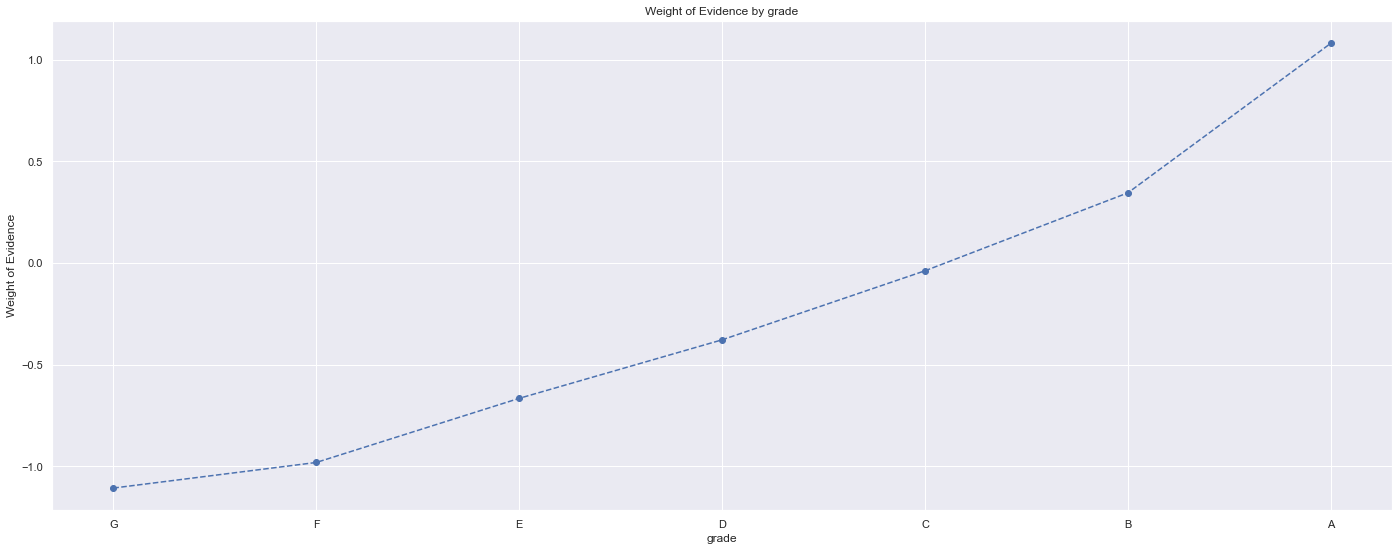

In [45]:
# we can visualize the weight of evidence by grade
# to do that, I created a function the places the WoE in the x-axis and the grade in the y-axis
def plot_woe(df, a, b, rotation_x_axis = 0):
  plt.figure(figsize = (24,9))
  x = np.array(df[a].apply(str))
  y = df[b]
  plt.plot(x, y, marker = 'o', linestyle = '--')
  plt.xlabel(str(a))
  plt.ylabel('Weight of Evidence')
  plt.xticks(rotation = rotation_x_axis)
  plt.title('Weight of Evidence by ' + a)

# apply the function
plot_woe(temp, 'grade', 'WoE')

In [46]:
# "grade G" has the lowest WoE, so it will be considered as the reference category
# now let's use these two functions to calculate and visualize the weight of evidence for all discrete variables we've decided to use for the probability of default model
# let's start with the "home_ownership" variable
temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
temp

home_ownership   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
3          OTHER     137   0.795620  0.000367     109.0     28.0     0.000324   
2           NONE      40   0.850000  0.000107      34.0      6.0     0.000101   
5           RENT  150599   0.887722  0.403720  133690.0  16909.0     0.396978   
4            OWN   33295   0.905181  0.089256   30138.0   3157.0     0.089492   
1       MORTGAGE  188956   0.914483  0.506546  172797.0  16159.0     0.513102   
0            ANY       1   1.000000  0.000003       1.0      0.0     0.000003   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
3    0.000772 -0.869566             NaN       NaN         inf  
2    0.000165 -0.494109        0.054380  0.375458         inf  
5    0.466339 -0.161032        0.037722  0.333077         inf  
4    0.087068  0.027455        0.017459  0.188487         inf  
1    0.445655  0.140931        0.009302  0.113476         inf  
0    0.000000       inf        0.085517       inf         inf

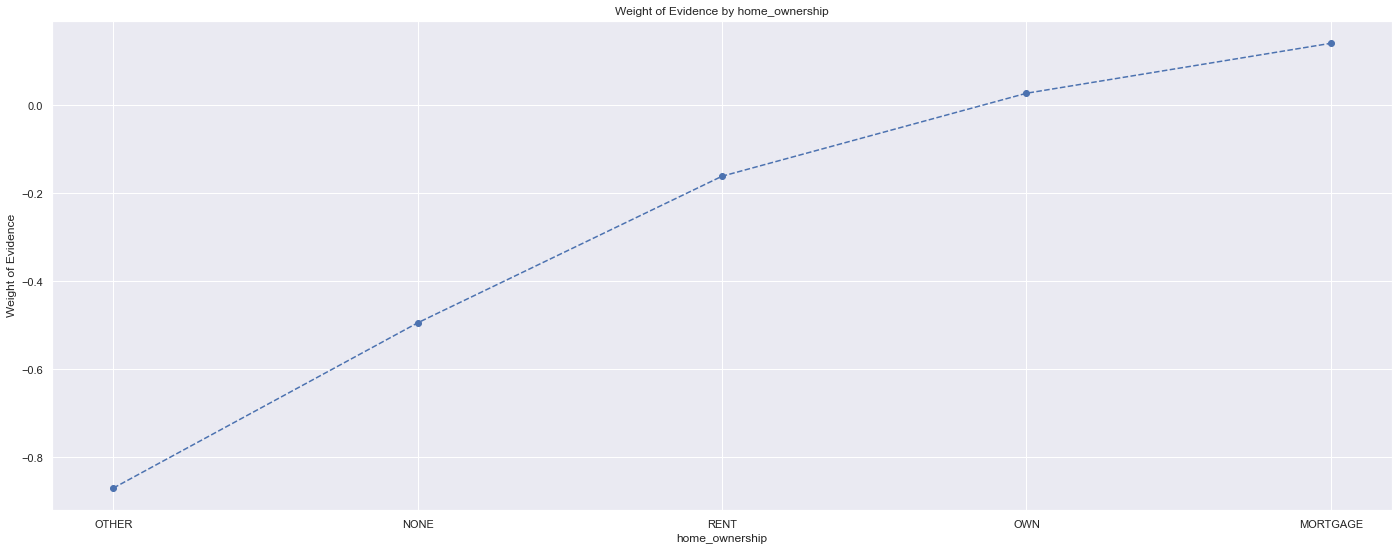

In [47]:
# visualize the weight of evidence by home_ownership
plot_woe(temp, 'home_ownership', 'WoE')

In [48]:
# we can see clearly that the categories "OTHER" and "NONE" are associated with the highest probability of default
# also, the proportion of the number of observations in the table show that there are very few loans associated with these categories
# the category "ANY" has no weight of evidence calculated because the number of obsevations is 3
# it doens't make sense to have dummies for these categories but we won't remove them either because this will mean losing the information about these customers
# in this case, I combined these underrepresented categories 
# the categories "OTHER", "NONE" and "ANY" are combined with the riskiest category "RENT" that has enough number of observations
# borrowers with the category "OWN" have higher weight of evidence than the ones with category "RENT" 
# so these two categories will be in two different dummy variables
# finally, the "MORTGAGE" category encompasses about half of all borrowers, hence it will be in separate dummy variable
# therefore, the categories "OTHER", "NONE", "ANY" and "RENT" will have their own dummy variable,
# the category "OWN" and "MORTGAGE" will have their own separate dummy variables 
# lets' create the dummy variable for "OTHER", "NONE", "ANY" and "RENT" 
# this dummy variable will have value 1 if the borrower has any of the 4 categories and 0 otherwise
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']])

In [49]:
df_inputs_prepr.shape

(373028, 208)

In [50]:
# print the unique values of the "addr_state" variable
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [51]:
# calculate and visualize the weight of evidence for the "addr_state" variable
temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


addr_state  n_obs  prop_good  obs_prop   n_good   n_bad  prop_n_good  \
28         NE     13   0.461538  0.000035      6.0     7.0     0.000018   
12         IA     13   0.769231  0.000035     10.0     3.0     0.000030   
32         NV   5221   0.880483  0.013996   4597.0   624.0     0.013650   
9          FL  25211   0.889215  0.067585  22418.0  2793.0     0.066568   
1          AL   4671   0.890387  0.012522   4159.0   512.0     0.012350   
31         NM   2075   0.892530  0.005563   1852.0   223.0     0.005499   
11         HI   2001   0.894553  0.005364   1790.0   211.0     0.005315   
24         MO   6017   0.894632  0.016130   5383.0   634.0     0.015984   
4          CA  57199   0.896432  0.153337  51275.0  5924.0     0.152256   
17         KY   3587   0.896850  0.009616   3217.0   370.0     0.009553   
44         VA  11366   0.897501  0.030470  10201.0  1165.0     0.030291   
33         NY  32211   0.897923  0.086350  28923.0  3288.0     0.085884   
27         NC  10204   0.897981  0.027355   9163.0  1041.0     0.027209   
43         UT   2756   0.898403  0.007388   2476.0   280.0     0.007352   
20         MD   8771   0.899441  0.023513   7889.0   882.0     0.023426   
30         NJ  14385   0.899826  0.038563  12944.0  1441.0     0.038436   
18         LA   4359   0.900206  0.011685   3924.0   435.0     0.011652   
35         OK   3284   0.900731  0.008804   2958.0   326.0     0.008783   
22         MI   9191   0.901425  0.024639   8285.0   906.0     0.024601   
41         TN   4845   0.902167  0.012988   4371.0   474.0     0.012979   
23         MN   6526   0.902697  0.017495   5891.0   635.0     0.017493   
3          AZ   8645   0.902718  0.023175   7804.0   841.0     0.023173   
8          DE   1064   0.903195  0.002852    961.0   103.0     0.002854   
37         PA  13090   0.903361  0.035091  11825.0  1265.0     0.035113   
2          AR   2760   0.903623  0.007399   2494.0   266.0     0.007406   
34         OH  12135   0.903997  0.032531  10970.0  1165.0     0.032574   
46         WA   8372   0.905399  0.022443   7580.0   792.0     0.022508   
19         MA   8858   0.906525  0.023746   8030.0   828.0     0.023844   
15         IN   5210   0.906910  0.013967   4725.0   485.0     0.014030   
10         GA  11960   0.907692  0.032062  10856.0  1104.0     0.032236   
38         RI   1647   0.908318  0.004415   1496.0   151.0     0.004442   
36         OR   4814   0.909015  0.012905   4376.0   438.0     0.012994   
47         WI   4740   0.911181  0.012707   4319.0   421.0     0.012825   
40         SD    801   0.911361  0.002147    730.0    71.0     0.002168   
6          CT   5775   0.913766  0.015481   5277.0   498.0     0.015669   
42         TX  29158   0.915392  0.078166  26691.0  2467.0     0.079256   
16         KS   3360   0.915774  0.009007   3077.0   283.0     0.009137   
14         IL  14833   0.916470  0.039764  13594.0  1239.0     0.040366   
26         MT   1103   0.916591  0.002957   1011.0    92.0     0.003002   
5          CO   7823   0.919596  0.020972   7194.0   629.0     0.021362   
39         SC   4448   0.920638  0.011924   4095.0   353.0     0.012160   
45         VT    727   0.921596  0.001949    670.0    57.0     0.001989   
0          AK   1003   0.923230  0.002689    926.0    77.0     0.002750   
25         MS    980   0.927551  0.002627    909.0    71.0     0.002699   
29         NH   1830   0.930601  0.004906   1703.0   127.0     0.005057   
49         WY    919   0.931447  0.002464    856.0    63.0     0.002542   
48         WV   1926   0.931464  0.005163   1794.0   132.0     0.005327   
7          DC   1129   0.940655  0.003027   1062.0    67.0     0.003153   
21         ME      2   1.000000  0.000005      2.0     0.0     0.000006   
13         ID     10   1.000000  0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
28    0.000193 -2.382860             NaN       NaN         inf  
12    0.000083 -1.024737        0.307692  1.358

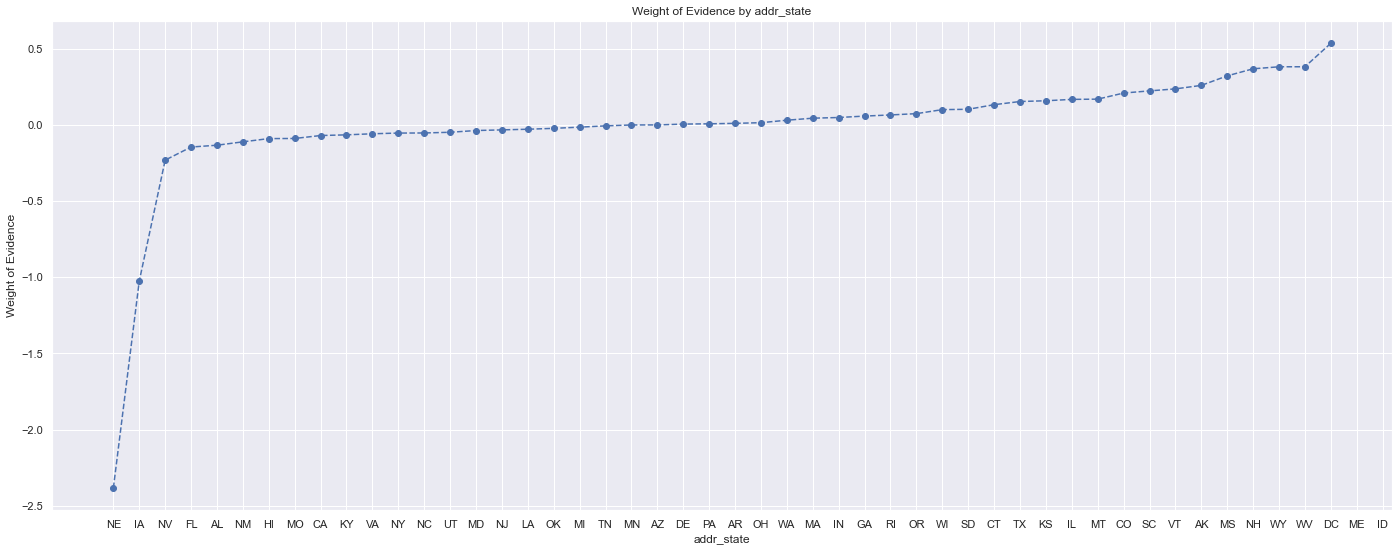

In [52]:
# visualize the weight of evidence by adress state
plot_woe(temp, 'addr_state', 'WoE')

In [53]:
# the graph shows the weight of evidence of only 50 states out of 51
# this is because there are no borrowers for one of the states, which is ND
# let's make sure there is a dummy for ND (North Dakota) state and set it to 0 when there is a missing value
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
  pass
else:
  df_inputs_prepr['addr_state:ND'] = 0

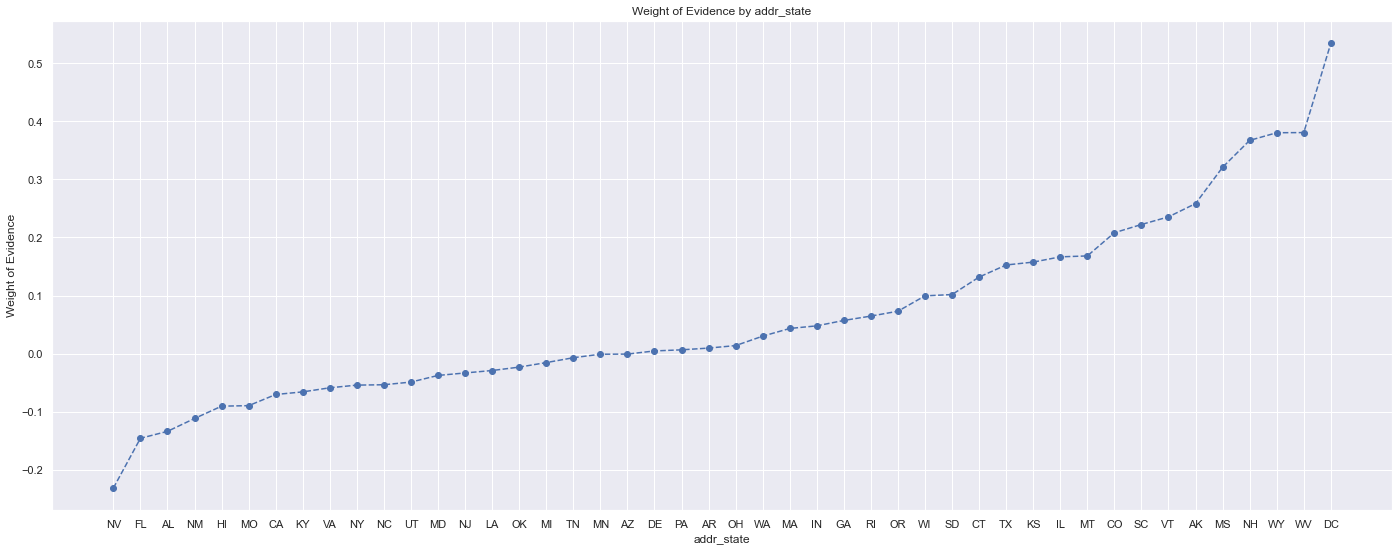

In [54]:
# the graph shows the weight of evidence of only 50 states out of 51
# this is because there are no borrowers for one of the states, which is ND
# we notice that there are two states "IA" and "ID" with considerably lower WoE comparing to most states
# on the other hand, there are two states "ME" and "ID" with higher WoE 
# note that the WoE for the "ME" and "ID" states could not be calculated because there are no bad borrowers  
# the other categories seem to habe approximately similar WoE values 
# looking back at the table, we can clearly see that the first and the last two states have the lowest number of observations
# I think it is very likely that the low number of observations is the reason of the extreme WoE values
# so I decided to include the first two states to the worst and the last two states to the best category respectively
# now let's focus on the other 46 categories
plot_woe(temp.iloc[2:-2, :], 'addr_state', 'WoE') # plots all the states excluding the first and the last two rows 

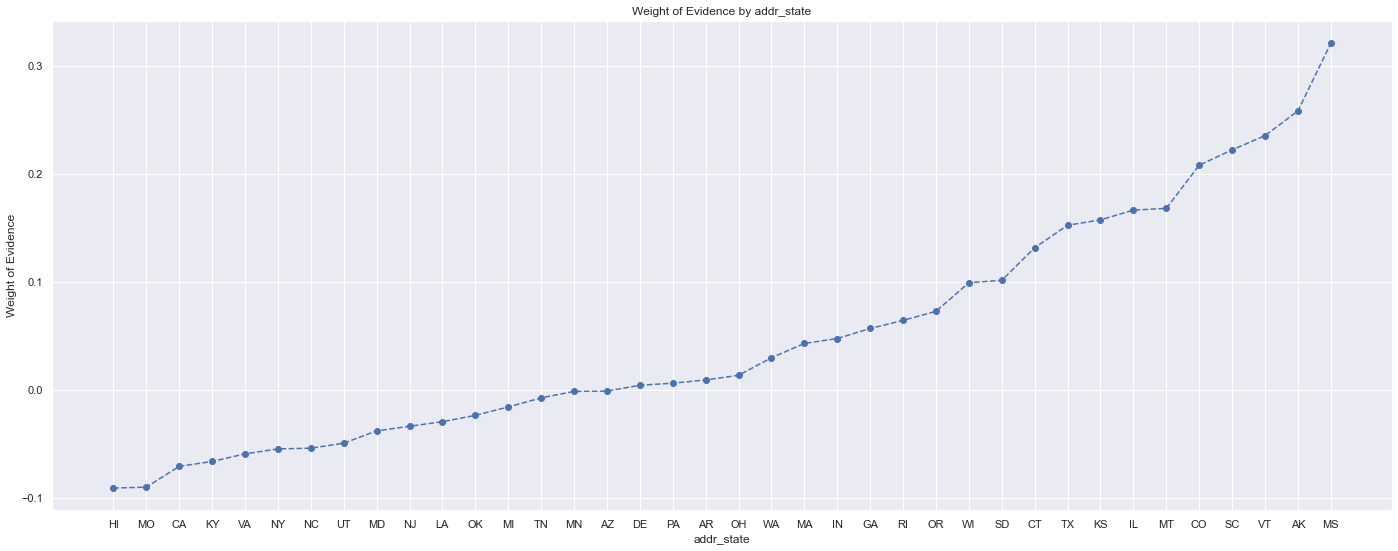

In [55]:
# this new graph gives us a different perspective
# it shows that actually after excluding the first two and the last two rows there are some differences between the WoE of the 46 states
# we can see that "NV" state has the lowest value comparing to the other states in the graph
# we can include it in the same category as "IA" and "ID" states
# also we place the state we have no information about in the worst (highest risk) category, when we have no information we assume the worst or highest risk
# on the other hand, we include the last four states in the graph "WV" to "MS" in the same category as "ND", "NE" and "ME"
# now let's focus on the remaining 41 states
plot_woe(temp.iloc[6:-6, :], 'addr_state', 'WoE')

In [56]:
# the graph above is usually what we expect from a typical WoE plot
# with the help of this graph I created dummy variable by grouping each number of states with approximately the same WoE values
# below is the code 
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                 df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [57]:
# print the unique values of the "verification_status" variable
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [58]:
# calculate the weight of evidence by "verification_status"
temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
temp

verification_status   n_obs  prop_good  obs_prop    n_good    n_bad  \
2            Verified  134414   0.885086  0.360332  118968.0  15446.0   
1     Source Verified  120030   0.910514  0.321772  109289.0  10741.0   
0        Not Verified  118584   0.915064  0.317896  108512.0  10072.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
2     0.353263    0.425991 -0.187205             NaN       NaN     0.02279  
1     0.324522    0.296230  0.091218        0.025428  0.278423     0.02279  
0     0.322215    0.277779  0.148392        0.004550  0.057174     0.02279

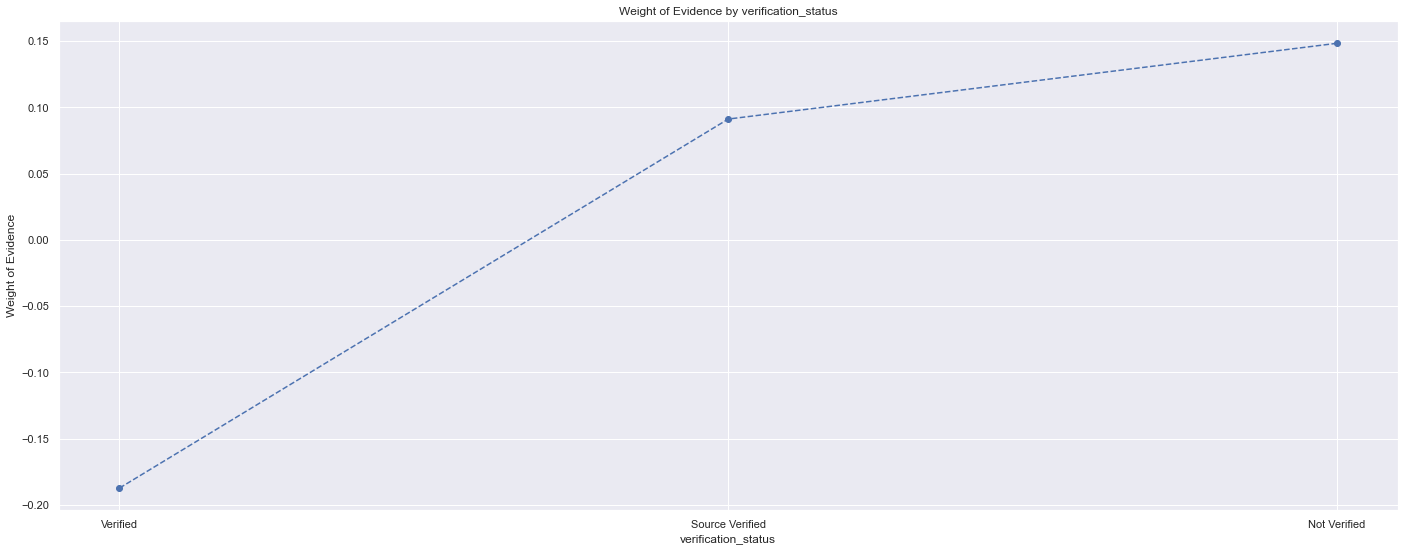

In [59]:
# visulaize the weight of evidence by "verification_status"
plot_woe(temp, 'verification_status', 'WoE')

In [60]:
# for the "verification_status" variable we have only three categories
# the category "Verified" has the lowest weight of evidence, the categories "Not Verified" and "Source Verified" are close in terms of WoE
# all three categories have approximately the same proportion of good and bad borrowers, so I decided to keep the same dummies for all three categories

In [61]:
# print the unique values of the "verification_status" variable
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'educational', 'other', 'home_improvement',
       'credit_card', 'major_purchase', 'wedding', 'small_business',
       'vacation', 'house', 'car', 'moving', 'renewable_energy',
       'medical'], dtype=object)

In [62]:
# calculate the weight of evidence by "purpose"
temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
temp

purpose   n_obs  prop_good  obs_prop    n_good    n_bad  \
11      small_business    5582   0.795951  0.014964    4443.0   1139.0   
3          educational     333   0.801802  0.000893     267.0     66.0   
8               moving    2392   0.852425  0.006412    2039.0    353.0   
10    renewable_energy     281   0.871886  0.000753     245.0     36.0   
9                other   18884   0.873279  0.050624   16491.0   2393.0   
5                house    1830   0.873770  0.004906    1599.0    231.0   
7              medical    3684   0.881650  0.009876    3248.0    436.0   
13             wedding    1887   0.882883  0.005059    1666.0    221.0   
12            vacation    1991   0.890005  0.005337    1772.0    219.0   
2   debt_consolidation  219183   0.899997  0.587578  197264.0  21919.0   
4     home_improvement   21238   0.912562  0.056934   19381.0   1857.0   
6       major_purchase    7837   0.912594  0.021009    7152.0    685.0   
0                  car    4325   0.914451  0.011594    3955.0    370.0   
1          credit_card   83581   0.924217  0.224061   77247.0   6334.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
11     0.013193    0.031413 -0.867530             NaN       NaN    0.041638  
3      0.000793    0.001820 -0.831116        0.005851  0.036415    0.041638  
8      0.006055    0.009736 -0.474963        0.050623  0.356153    0.041638  
10     0.000728    0.000993 -0.310970        0.019461  0.163993    0.041638  
9      0.048968    0.065997 -0.298443        0.001393  0.012528    0.041638  
5      0.004748    0.006371 -0.293994        0.000492  0.004449    0.041638  
7      0.009645    0.012025 -0.220557        0.007880  0.073436    0.041638  
13     0.004947    0.006095 -0.208691        0.001233  0.011866    0.041638  
12     0.005262    0.006040 -0.137917        0.007122  0.070774    0.041638  
2      0.585755    0.604512 -0.031521        0.009992  0.106397    0.041638  
4      0.057550    0.051215  0.116621        0.012566  0.148142    0.041638  
6      0.021237    0.018892  0.117019        0.000032  0.000398    0.041638  
0      0.011744    0.010204  0.140523        0.001857  0.023504    0.041638  
1      0.229377    0.174688  0.272367        0.009766  0.131843    0.041638

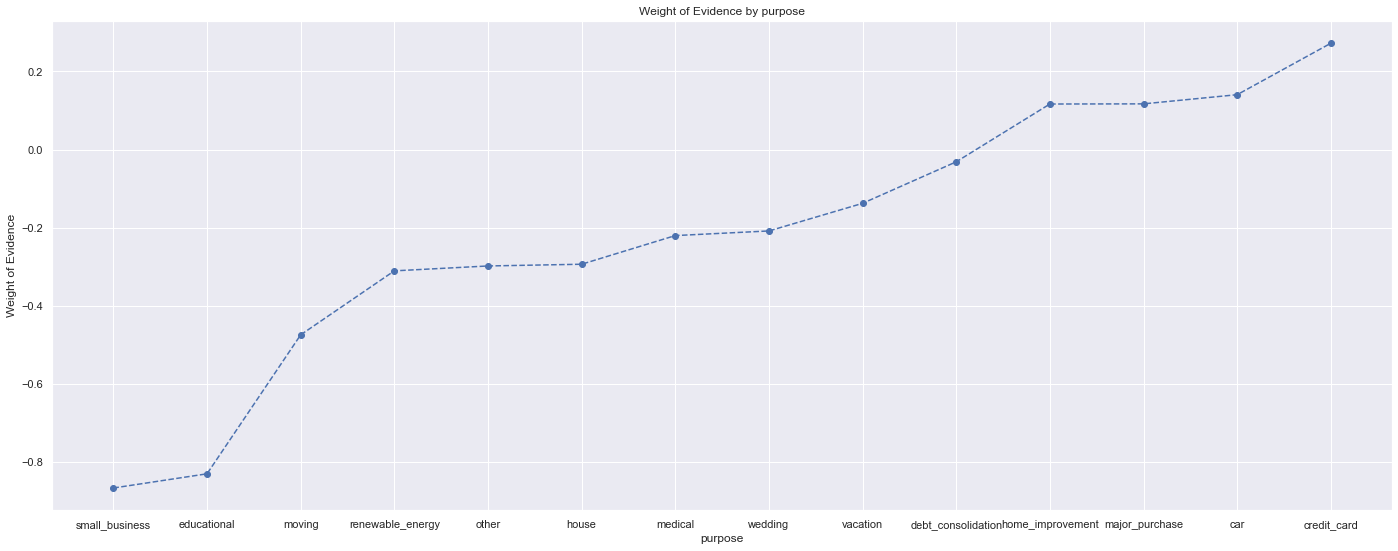

In [63]:
# visulaize the weight of evidence by "purpose"
plot_woe(temp, 'purpose', 'WoE')

In [64]:
# the code below illustrates how I assigned the dummy variables
df_inputs_prepr['purpose:educ_smb_wedd_renen_mov_house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth_med_vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                   df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:majorpurch_car_homeimpr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                          df_inputs_prepr['purpose:home_improvement']])

In [65]:
df_inputs_prepr.shape

(373028, 223)

In [66]:
# print the unique values of the "initial_list_status" variable
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [67]:
# calculate the weight of evidence by "initial_list_status"
temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
temp

initial_list_status   n_obs  prop_good  obs_prop    n_good    n_bad  \
0                   f  242514   0.890213  0.650123  215889.0  26625.0   
1                   w  130514   0.926184  0.349877  120880.0   9634.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.64106      0.7343 -0.135796             NaN       NaN    0.040708  
1      0.35894      0.2657  0.300790        0.035972  0.436586    0.040708

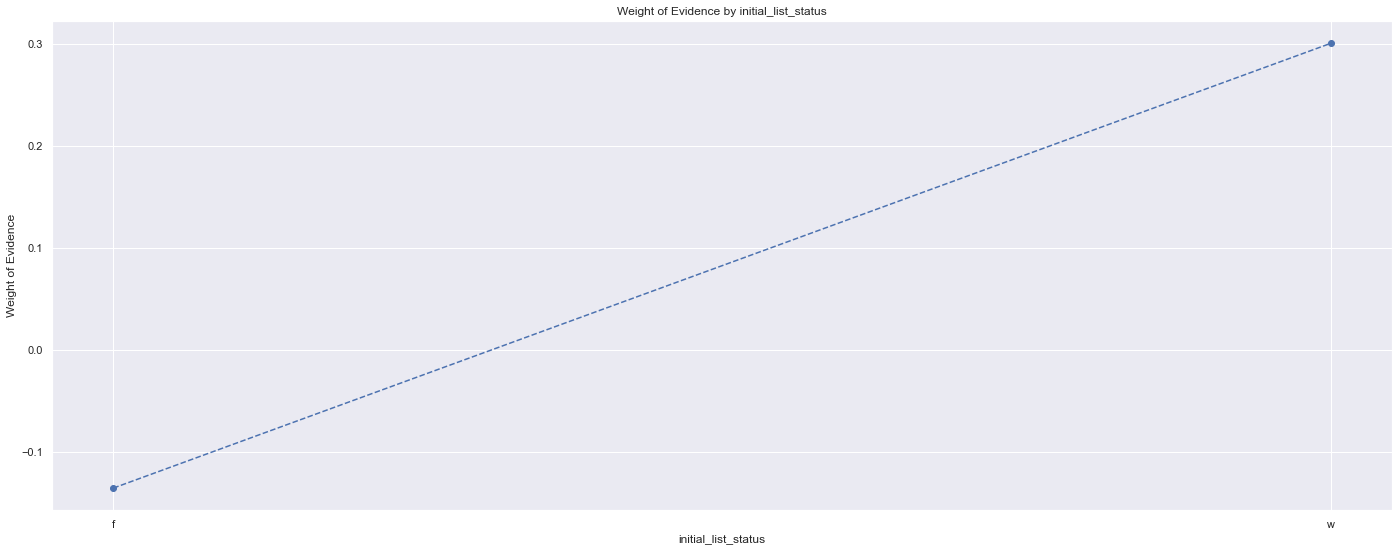

In [68]:
# visulaize the weight of evidence by "initial_list_status"
plot_woe(temp, 'initial_list_status', 'WoE')

In [69]:
# the "initial_list_status" variable has two categories "f" and "w"
# the "f" category has the lowest weight of evidence while the "w" category has the highest weight of evidence
# it makes more sens that each variable has its own dummy
# so we leave these dummy variables as they are
# the variable "initial_list_status:f" will be the reference category

##### Preprocessing continuous variables

In [70]:
# in this step, we need to split the continuous variables into categorical ones
# continuous variables show quantitative differences
# theses variables will be ordered by their values and not by their weight of evidence 
# thus we only need to use the previous function that calculates the weight of evidence
# the function below takes a variable containing the categories of a continuous variable obtained via fine classing
# the difference with the previous function appears right after it calculates the weight of evidence
# here we don't want the values to be ordered by their weight of evidence
# rather, we want to preserve their natural order which is compliant with the ascending order of the values of the continuous independant variable
# hence, I commented out the df.sort_values() and df.reset_index() methods
def woe_continuous(df, discrete_variable_name, target):
  df = pd.concat([df[discrete_variable_name], target], axis = 1)
  df_count = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()
  df_prop = df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
  df = pd.concat([df_count, df_prop], axis = 1)
  df = df.iloc[:, [0,1,3]]
  df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
  df['obs_prop'] = df['n_obs'] / df['n_obs'].sum()
  df['n_good'] = df['prop_good'] * df['n_obs']
  df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
  df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
  df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
  df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
  #df.sort_values(by = 'WoE', inplace = True)
  #df.reset_index(drop = True)
  df['diff_prop_good'] = df['prop_good'].diff().abs()
  df['diff_WoE'] = df['WoE'].diff().abs()
  df['Info_Value'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
  df['Info_Value'] = df['Info_Value'].sum()
  return df

# let's now create our dummy variables

In [71]:
# print the unique values of the "term_int" variable
df_inputs_prepr["term_int"].unique()

array([36, 60], dtype=int64)

In [72]:
# this variable contains only two categories "60" and "36"
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
temp

term_int   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
0        36  270419   0.913216  0.724929  246951.0  23468.0     0.733295   
1        60  102609   0.875342  0.275071   89818.0  12791.0     0.266705   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0    0.647232  0.124843             NaN       NaN    0.034813  
1    0.352768 -0.279666        0.037874  0.404509    0.034813

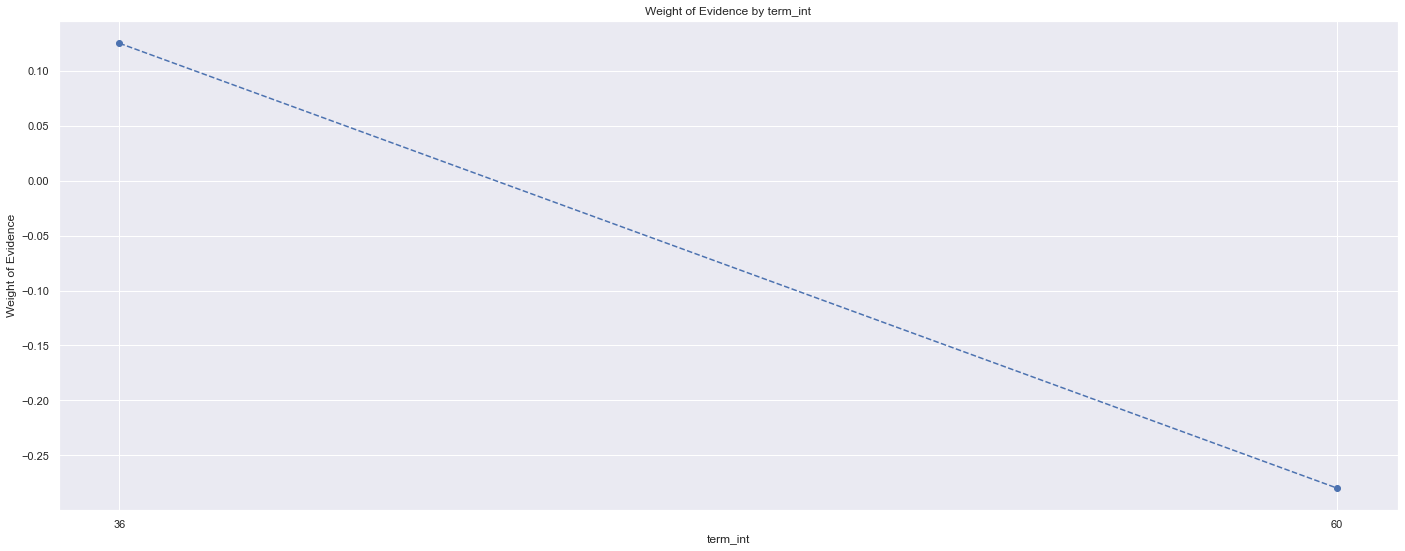

In [73]:
# visualize the weight of evidence by "term_int"
plot_woe(temp, 'term_int', 'WoE')

In [74]:
# the plot shows that the "60" months loans is much riskier than the "36" months loans
# the only thing we can do here to keep both categories, and take the "60" category as a reference category
# create a dummy variable for each category with the np.where() method
df_inputs_prepr['term:36'] = np.where(df_inputs_prepr['term_int'] == 36, 1, 0)
df_inputs_prepr['term:60'] = np.where(df_inputs_prepr['term_int'] == 60, 1, 0)

In [75]:
df_inputs_prepr.shape

(373028, 225)

In [76]:
# print the unique values for the employment length variable
df_inputs_prepr['emp_length_int'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [77]:
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
temp

emp_length_int   n_obs  prop_good  obs_prop    n_good    n_bad  \
0              0.0   45720   0.889764  0.122565   40680.0   5040.0   
1              1.0   23654   0.898875  0.063411   21262.0   2392.0   
2              2.0   33078   0.902594  0.088674   29856.0   3222.0   
3              3.0   29205   0.902688  0.078292   26363.0   2842.0   
4              4.0   22468   0.900614  0.060231   20235.0   2233.0   
5              5.0   24602   0.895496  0.065952   22031.0   2571.0   
6              6.0   20887   0.896922  0.055993   18734.0   2153.0   
7              7.0   21049   0.899520  0.056427   18934.0   2115.0   
8              8.0   17853   0.903322  0.047860   16127.0   1726.0   
9              9.0   14267   0.900680  0.038246   12850.0   1417.0   
10            10.0  120245   0.912279  0.322348  109697.0  10548.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.120795    0.139000 -0.140379             NaN       NaN    0.007444  
1      0.063135    0.065970 -0.043918        0.009112  0.096461    0.007444  
2      0.088654    0.088861 -0.002326        0.003718  0.041592    0.007444  
3      0.078282    0.078381 -0.001256        0.000094  0.001070    0.007444  
4      0.060086    0.061585 -0.024642        0.002074  0.023386    0.007444  
5      0.065419    0.070907 -0.080554        0.005118  0.055912    0.007444  
6      0.055629    0.059378 -0.065232        0.001425  0.015322    0.007444  
7      0.056223    0.058330 -0.036805        0.002599  0.028427    0.007444  
8      0.047887    0.047602  0.005979        0.003801  0.042784    0.007444  
9      0.038157    0.039080 -0.023908        0.002642  0.029886    0.007444  
10     0.325734    0.290907  0.113076        0.011599  0.136984    0.007444

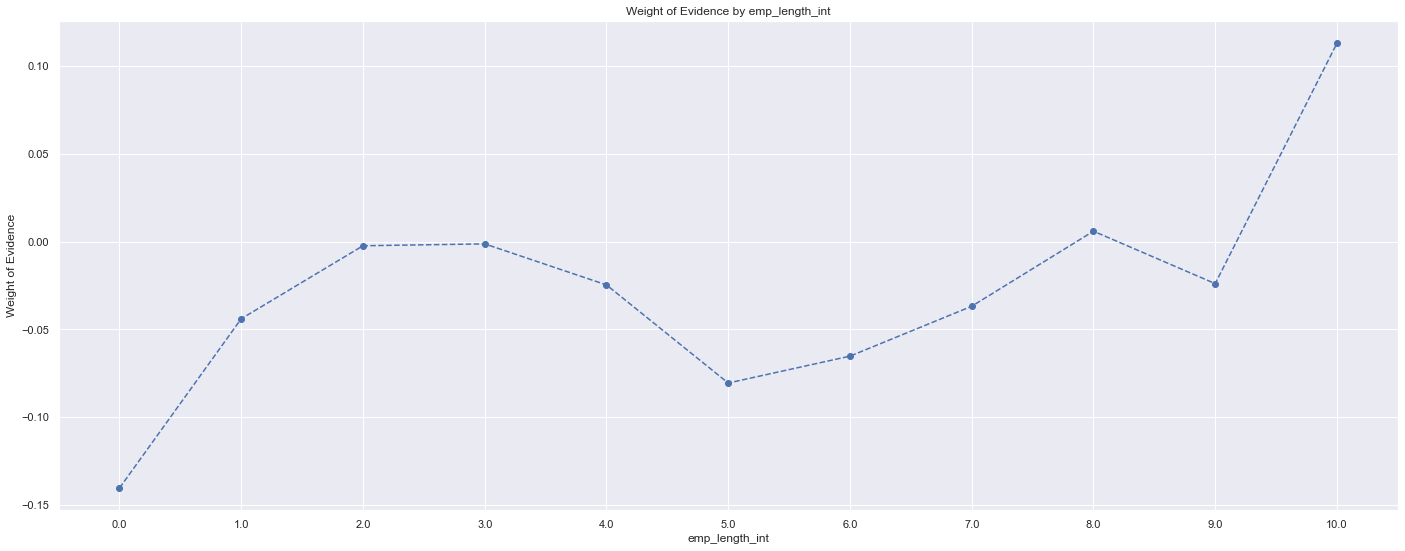

In [78]:
# visualize the weight of evidence by "emp_length_int"
plot_woe(temp, 'emp_length_int', 'WoE')

In [79]:
# bed on how the weight of evidence changes with the number employment length categories we can easily determine the number of categories for the PD model
# the first category will be the "0" employment length
# the second category will be the "1" employment length
# the third category will be from "2" to "4" employment length categories as the WoE hardly changes between the two
# the "5" and "6" categories have approximately the same WoE, so I chose to group them into the same dummy
# categories "7", "8" and "9" will have their own dummies as they differ in terms of WoE
# the riskiest group is the "0" category so I'll use it as a reference category
# now that we have a plan, we can proceed to create the dummies themselves
df_inputs_prepr['emp_length_int:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length_int:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length_int:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length_int:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length_int:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length_int:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [80]:
df_inputs_prepr.shape

(373028, 231)

In [81]:
# print the unique values for the "mths_since_issue_d"
df_inputs_prepr['mth_issue_date'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [82]:
# with this variable we'll following the steps described below:
# first, we will do fine classing to roughly group the values into categories
# second, we will do coarse classing to determine final categories combining few of the initial fine classing categories into bigger categories if needed 
# we will the pd.cut() method to divide the variable into 50 categories
df_inputs_prepr['mth_issue_date_factor'] = pd.cut(df_inputs_prepr['mth_issue_date'], 50)
df_inputs_prepr['mth_issue_date_factor'].head()

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
Name: mth_issue_date_factor, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [83]:
# now we can treat our new categorical variable as any other categorical variable
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'mth_issue_date_factor', df_targets_prepr)
temp

mth_issue_date_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0          (35.91, 37.8]  28170   0.961839  0.075517  27095.0  1075.0   
1           (37.8, 39.6]  39636   0.946690  0.106255  37523.0  2113.0   
2           (39.6, 41.4]  38614   0.934350  0.103515  36079.0  2535.0   
3           (41.4, 43.2]  29038   0.924409  0.077844  26843.0  2195.0   
4           (43.2, 45.0]  28367   0.918285  0.076045  26049.0  2318.0   
5           (45.0, 46.8]  12165   0.911961  0.032611  11094.0  1071.0   
6           (46.8, 48.6]  24451   0.912887  0.065547  22321.0  2130.0   
7           (48.6, 50.4]  22969   0.900953  0.061574  20694.0  2275.0   
8           (50.4, 52.2]  20640   0.890165  0.055331  18373.0  2267.0   
9           (52.2, 54.0]  18312   0.877730  0.049090  16073.0  2239.0   
10          (54.0, 55.8]   8286   0.866401  0.022213   7179.0  1107.0   
11          (55.8, 57.6]  14120   0.872663  0.037852  12322.0  1798.0   
12          (57.6, 59.4]  11529   0.866684  0.030907   9992.0  1537.0   
13          (59.4, 61.2]   9974   0.860036  0.026738   8578.0  1396.0   
14          (61.2, 63.0]   9811   0.854857  0.026301   8387.0  1424.0   
15          (63.0, 64.8]   4304   0.846190  0.011538   3642.0   662.0   
16          (64.8, 66.6]   6723   0.827458  0.018023   5563.0  1160.0   
17          (66.6, 68.4]   5334   0.842707  0.014299   4495.0   839.0   
18          (68.4, 70.2]   4377   0.848983  0.011734   3716.0   661.0   
19          (70.2, 72.0]   3868   0.829628  0.010369   3209.0   659.0   
20          (72.0, 73.8]   1785   0.855462  0.004785   1527.0   258.0   
21          (73.8, 75.6]   3395   0.854786  0.009101   2902.0   493.0   
22          (75.6, 77.4]   3055   0.856956  0.008190   2618.0   437.0   
23          (77.4, 79.2]   2849   0.842401  0.007637   2400.0   449.0   
24          (79.2, 81.0]   2412   0.853234  0.006466   2058.0   354.0   
25          (81.0, 82.8]   1044   0.870690  0.002799    909.0   135.0   
26          (82.8, 84.6]   2182   0.870761  0.005849   1900.0   282.0   
27          (84.6, 86.4]   1997   0.855283  0.005353   1708.0   289.0   
28          (86.4, 88.2]   1921   0.834461  0.005150   1603.0   318.0   
29          (88.2, 90.0]   1870   0.842246  0.005013   1575.0   295.0   
30          (90.0, 91.8]    795   0.859119  0.002131    683.0   112.0   
31          (91.8, 93.6]   1373   0.890750  0.003681   1223.0   150.0   
32          (93.6, 95.4]   1087   0.874885  0.002914    951.0   136.0   
33          (95.4, 97.2]   1044   0.882184  0.002799    921.0   123.0   
34          (97.2, 99.0]    877   0.856328  0.002351    751.0   126.0   
35         (99.0, 100.8]    346   0.878613  0.000928    304.0    42.0   
36        (100.8, 102.6]    647   0.863988  0.001734    559.0    88.0   
37        (102.6, 104.4]    542   0.850554  0.001453    461.0    81.0   
38        (104.4, 106.2]    497   0.869215  0.001332    432.0    65.0   
39        (106.2, 108.0]    403   0.853598  0.001080    344.0    59.0   
40        (108.0, 109.8]    173   0.803468  0.000464    139.0    34.0   
41        (109.8, 111.6]    139   0.834532  0.000373    116.0    23.0   
42        (111.6, 113.4]    204   0.799020  0.000547    163.0    41.0   
43        (113.4, 115.2]    182   0.796703  0.000488    145.0    37.0   
44        (115.2, 117.0]    530   0.762264  0.001421    404.0   126.0   
45        (117.0, 118.8]    247   0.797571  0.000662    197.0    50.0   
46        (118.8, 120.6]    394   0.723350  0.001056    285.0   109.0   
47        (120.6, 122.4]    176   0.704545  0.000472    124.0    52.0   
48        (122.4, 124.2]    104   0.750000  0.000279     78.0    26.0   
49        (124.2, 126.0]     70   0.885714  0.000188     62.0     8.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.080456    0.029648  0.998319             NaN       NaN    0.196152  
1      0.111421    0.058275  0.648136        0.015149  0.350183    0.196152  
2      0.107133    0.069914  0.426808        

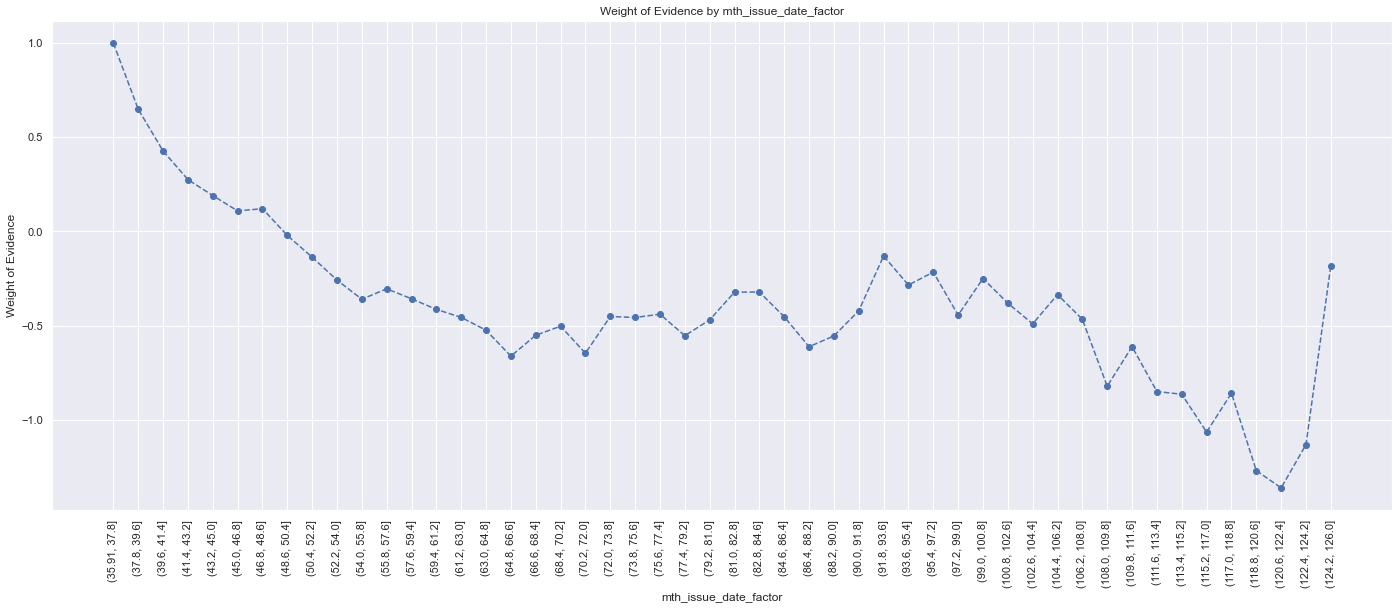

In [84]:
# visualize the weight of evidence by "emp_length_int"
plot_woe(temp, 'mth_issue_date_factor', 'WoE', 90)

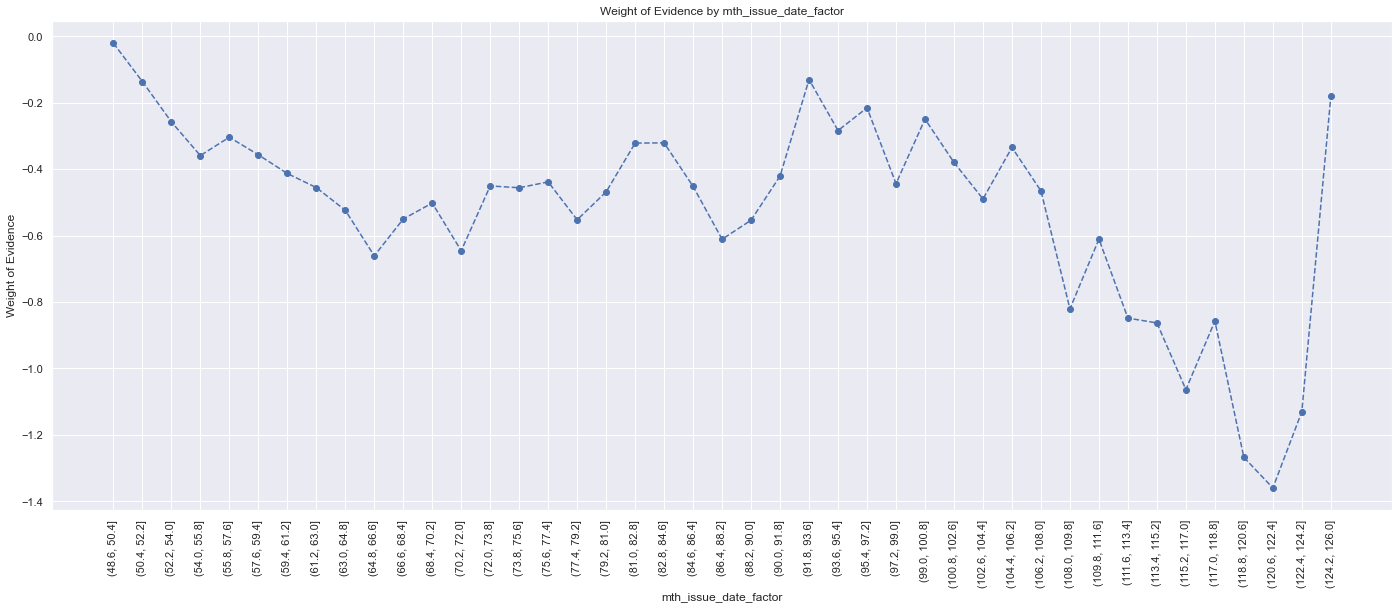

In [85]:
# as we can see, the first 7 points have very high WoE, so each of them will have their own dummies
# let's plot again the weights of evidence of the categories without the first 4 ones to see the differences mre easily
plot_woe(temp.iloc[7:, :], 'mth_issue_date_factor', 'WoE', 90)

In [86]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mth_issue_date:<38'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38)), 1, 0)
df_inputs_prepr['mth_issue_date:38-39'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mth_issue_date:40-41'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mth_issue_date:42-48'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mth_issue_date:49-52'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mth_issue_date:53-64'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mth_issue_date:65-84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mth_issue_date:>84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(85, int(df_inputs_prepr['mth_issue_date'].max()))), 1, 0)

In [87]:
df_inputs_prepr.shape

(373028, 240)

In [88]:
# the next variable is going to be the interest rate variable "int_rate"
# print the unique values of this variable
df_inputs_prepr['int_rate'].unique()

array([ 8.9 , 14.33, 16.59, 12.84,  7.49, 10.62, 20.31,  9.17, 15.31,
       16.49,  9.67, 15.8 , 13.65, 14.64, 22.15, 12.49, 10.15, 18.55,
       11.14, 10.64, 15.1 , 16.29, 17.57, 13.67, 11.99, 16.2 , 15.61,
       16.99,  7.12, 12.99, 12.12, 16.78, 11.67, 13.35,  7.51, 18.25,
       10.59, 13.99, 23.1 ,  6.03, 14.16, 13.11, 20.99, 22.2 , 10.99,
       18.85, 19.52, 23.83, 22.45,  7.69, 20.2 ,  6.62, 11.86, 14.09,
       18.49,  9.99,  7.9 , 14.3 , 13.98,  7.62, 21.  , 16.89, 17.19,
       11.55, 16.07, 10.65, 18.75, 18.92, 14.49, 17.14,  8.49, 13.61,
        6.49, 15.59,  9.71, 18.64, 17.27, 12.69, 14.72, 23.7 , 10.37,
        6.92, 10.95, 10.36, 12.35, 19.91, 12.53, 25.8 , 17.77, 11.44,
       17.76, 24.08, 19.2 , 17.56, 19.99,  8.39, 10.16, 18.99,  9.76,
       22.47, 14.99, 13.05,  6.17, 17.1 , 11.11, 18.54, 13.66, 14.31,
       11.71, 20.5 , 14.47, 14.98, 19.72, 13.49,  7.88, 14.65, 15.22,
       13.48, 14.54, 17.99,  6.54, 21.18, 11.12, 12.85, 14.82, 23.43,
       13.43, 16.24,

In [89]:
# the same steps will be carried out as for the "mth_issue_date" variable
# we will again use the pd.cut() method to divide the variable into 50 categories
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['int_rate_factor'].head()

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
Name: int_rate_factor, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [90]:
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
temp

int_rate_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0     (5.399, 5.833]    785   0.961783  0.002104    755.0    30.0   
1     (5.833, 6.246]   8459   0.982149  0.022677   8308.0   151.0   
2     (6.246, 6.658]   7826   0.974572  0.020980   7627.0   199.0   
3     (6.658, 7.071]   1816   0.974119  0.004868   1769.0    47.0   
4     (7.071, 7.484]   3143   0.980274  0.008426   3081.0    62.0   
5     (7.484, 7.897]  12581   0.966219  0.033727  12156.0   425.0   
6      (7.897, 8.31]   9687   0.954062  0.025969   9242.0   445.0   
7      (8.31, 8.722]   6594   0.973612  0.017677   6420.0   174.0   
8     (8.722, 9.135]   9539   0.940979  0.025572   8976.0   563.0   
9     (9.135, 9.548]   6681   0.971711  0.017910   6492.0   189.0   
10    (9.548, 9.961]   7588   0.937533  0.020342   7114.0   474.0   
11   (9.961, 10.374]  10941   0.940408  0.029330  10289.0   652.0   
12  (10.374, 10.786]   5857   0.918730  0.015701   5381.0   476.0   
13  (10.786, 11.199]  17851   0.937370  0.047854  16733.0  1118.0   
14  (11.199, 11.612]   4876   0.923298  0.013071   4502.0   374.0   
15  (11.612, 12.025]  15597   0.942297  0.041812  14697.0   900.0   
16  (12.025, 12.438]  12336   0.899481  0.033070  11096.0  1240.0   
17   (12.438, 12.85]  11065   0.934659  0.029663  10342.0   723.0   
18   (12.85, 13.263]  21329   0.915092  0.057178  19518.0  1811.0   
19  (13.263, 13.676]  15392   0.922297  0.041262  14196.0  1196.0   
20  (13.676, 14.089]  10991   0.911109  0.029464  10014.0   977.0   
21  (14.089, 14.502]  23436   0.900282  0.062826  21099.0  2337.0   
22  (14.502, 14.914]   4333   0.872606  0.011616   3781.0   552.0   
23  (14.914, 15.327]  18932   0.895151  0.050752  16947.0  1985.0   
24   (15.327, 15.74]  12327   0.906952  0.033046  11180.0  1147.0   
25   (15.74, 16.153]   7477   0.849271  0.020044   6350.0  1127.0   
26  (16.153, 16.566]  12991   0.876684  0.034826  11389.0  1602.0   
27  (16.566, 16.978]   4237   0.857682  0.011358   3634.0   603.0   
28  (16.978, 17.391]  11396   0.869252  0.030550   9906.0  1490.0   
29  (17.391, 17.804]  12288   0.858724  0.032941  10552.0  1736.0   
30  (17.804, 18.217]   1306   0.839204  0.003501   1096.0   210.0   
31   (18.217, 18.63]  11036   0.852664  0.029585   9410.0  1626.0   
32   (18.63, 19.042]   6808   0.837397  0.018251   5701.0  1107.0   
33  (19.042, 19.455]   4425   0.817401  0.011862   3617.0   808.0   
34  (19.455, 19.868]   6763   0.844004  0.018130   5708.0  1055.0   
35  (19.868, 20.281]   4899   0.854052  0.013133   4184.0   715.0   
36  (20.281, 20.694]   3221   0.814964  0.008635   2625.0   596.0   
37  (20.694, 21.106]   4016   0.824203  0.010766   3310.0   706.0   
38  (21.106, 21.519]   2729   0.799560  0.007316   2182.0   547.0   
39  (21.519, 21.932]    989   0.775531  0.002651    767.0   222.0   
40  (21.932, 22.345]   3476   0.815305  0.009318   2834.0   642.0   
41  (22.345, 22.758]   2251   0.779653  0.006034   1755.0   496.0   
42   (22.758, 23.17]   1535   0.788274  0.004115   1210.0   325.0   
43   (23.17, 23.583]   2652   0.804676  0.007109   2134.0   518.0   
44  (23.583, 23.996]   1573   0.742530  0.004217   1168.0   405.0   
45  (23.996, 24.409]   1455   0.795189  0.003901   1157.0   298.0   
46  (24.409, 24.822]   1664   0.787861  0.004461   1311.0   353.0   
47  (24.822, 25.234]   1315   0.790114  0.003525   1039.0   276.0   
48  (25.234, 25.647]    778   0.775064  0.002086    603.0   175.0   
49   (25.647, 26.06]   1786   0.790594  0.004788   1412.0   374.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.002242    0.000827  0.996811             NaN       NaN    0.345435  
1      0.024670    0.004164  1.778985        0.020366  0.782174    0.345435  
2      0.022648    0.005488  1.417435        0.007577  0.361549    0.345435  
3      0.005253    0.001296  1.399312        0.000453  0.018123    0.345435  
4      0.009149    0.001710  1.677166        0.006155  0.277853    0.345435  
5      0.036096  

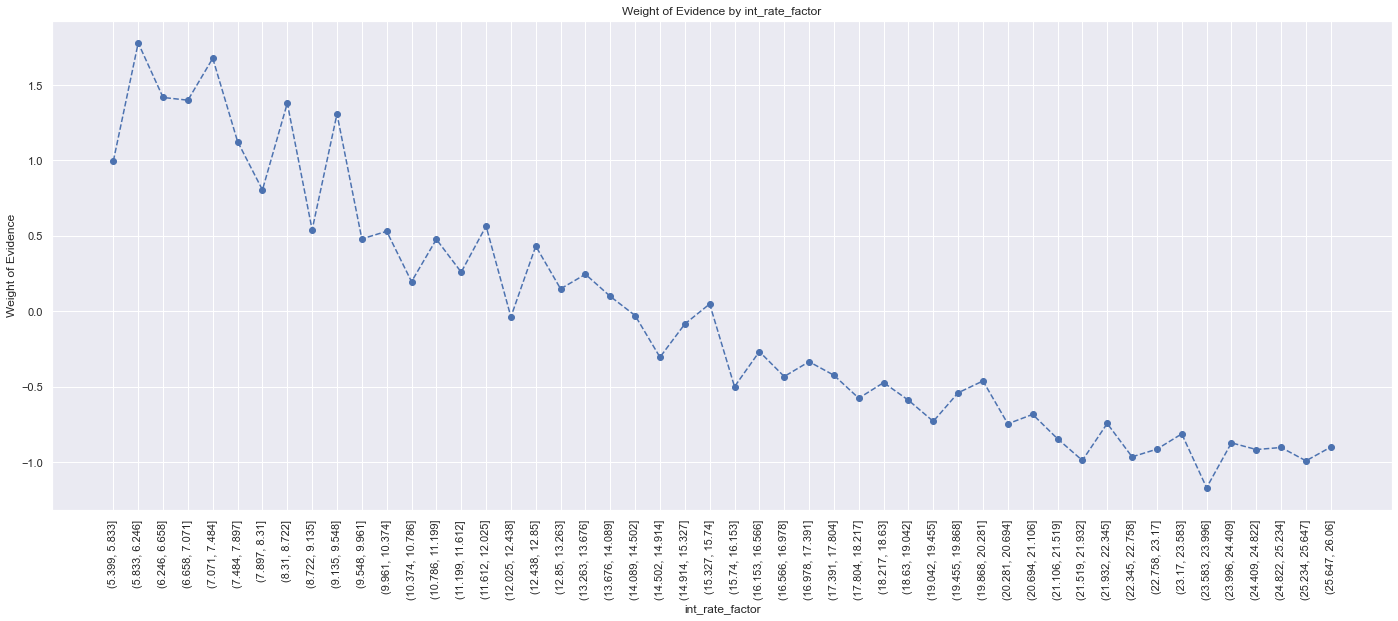

In [91]:
# visualize the weight of evidence by "emp_length_int"
plot_woe(temp, 'int_rate_factor', 'WoE', 90)

In [92]:
# we can see from the plot above that the WoE decreases when the interest rate increases 
# this makes it somehow easier to determine the boundaries of the intervals
# the cutoff point will be at a point where the WoE decreases significantly compared to the previous value
# the following lines of code illustrate the details of the approach
df_inputs_prepr['int_rate: < 9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548 - 12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025 - 15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74 - 20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate: > 20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [93]:
df_inputs_prepr.shape

(373028, 246)

In [94]:
# the next variable that is going to be processed similarly is the funded amount variable "funded_amnt"
# we will again use the pd.cut() method to divide the variable into 50 categories
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_inputs_prepr['funded_amnt_factor'].head()

427211    (23960.0, 24650.0]
206088     (9470.0, 10160.0]
136020    (19820.0, 20510.0]
412305    (17060.0, 17750.0]
36159       (8090.0, 8780.0]
Name: funded_amnt_factor, dtype: category
Categories (50, interval[float64]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [95]:
# calculate the weight of evidence for this variable
temp = woe_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
temp

funded_amnt_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0      (465.5, 1190.0]   1224   0.913399  0.003281   1118.0   106.0   
1     (1190.0, 1880.0]   3028   0.908520  0.008117   2751.0   277.0   
2     (1880.0, 2570.0]   6018   0.899634  0.016133   5414.0   604.0   
3     (2570.0, 3260.0]   7248   0.895695  0.019430   6492.0   756.0   
4     (3260.0, 3950.0]   4751   0.896864  0.012736   4261.0   490.0   
5     (3950.0, 4640.0]   9023   0.898703  0.024189   8109.0   914.0   
6     (4640.0, 5330.0]  15903   0.902471  0.042632  14352.0  1551.0   
7     (5330.0, 6020.0]  17236   0.914307  0.046206  15759.0  1477.0   
8     (6020.0, 6710.0]   6914   0.896731  0.018535   6200.0   714.0   
9     (6710.0, 7400.0]  11806   0.910300  0.031649  10747.0  1059.0   
10    (7400.0, 8090.0]  17692   0.907981  0.047428  16064.0  1628.0   
11    (8090.0, 8780.0]   6316   0.895028  0.016932   5653.0   663.0   
12    (8780.0, 9470.0]   9168   0.892343  0.024577   8181.0   987.0   
13   (9470.0, 10160.0]  33410   0.907902  0.089564  30333.0  3077.0   
14  (10160.0, 10850.0]   6755   0.890303  0.018109   6014.0   741.0   
15  (10850.0, 11540.0]   8559   0.893679  0.022945   7649.0   910.0   
16  (11540.0, 12230.0]  23506   0.914745  0.063014  21502.0  2004.0   
17  (12230.0, 12920.0]   4802   0.889213  0.012873   4270.0   532.0   
18  (12920.0, 13610.0]   7247   0.908928  0.019427   6587.0   660.0   
19  (13610.0, 14300.0]   8123   0.907423  0.021776   7371.0   752.0   
20  (14300.0, 14990.0]   5183   0.889639  0.013894   4611.0   572.0   
21  (14990.0, 15680.0]  21757   0.911569  0.058325  19833.0  1924.0   
22  (15680.0, 16370.0]  11788   0.896166  0.031601  10564.0  1224.0   
23  (16370.0, 17060.0]   6538   0.886968  0.017527   5799.0   739.0   
24  (17060.0, 17750.0]   3422   0.880187  0.009174   3012.0   410.0   
25  (17750.0, 18440.0]  11441   0.896862  0.030671  10261.0  1180.0   
26  (18440.0, 19130.0]   3919   0.882368  0.010506   3458.0   461.0   
27  (19130.0, 19820.0]   4004   0.875624  0.010734   3506.0   498.0   
28  (19820.0, 20510.0]  20287   0.912801  0.054385  18518.0  1769.0   
29  (20510.0, 21200.0]   6712   0.907628  0.017993   6092.0   620.0   
30  (21200.0, 21890.0]   2081   0.864969  0.005579   1800.0   281.0   
31  (21890.0, 22580.0]   4114   0.903500  0.011029   3717.0   397.0   
32  (22580.0, 23270.0]   2445   0.894888  0.006554   2188.0   257.0   
33  (23270.0, 23960.0]   1825   0.865205  0.004892   1579.0   246.0   
34  (23960.0, 24650.0]   9836   0.915819  0.026368   9008.0   828.0   
35  (24650.0, 25340.0]  10074   0.902224  0.027006   9089.0   985.0   
36  (25340.0, 26030.0]   1832   0.884825  0.004911   1621.0   211.0   
37  (26030.0, 26720.0]   1252   0.853834  0.003356   1069.0   183.0   
38  (26720.0, 27410.0]   1510   0.882781  0.004048   1333.0   177.0   
39  (27410.0, 28100.0]   6457   0.920861  0.017310   5946.0   511.0   
40  (28100.0, 28790.0]    795   0.876730  0.002131    697.0    98.0   
41  (28790.0, 29480.0]   1176   0.880952  0.003153   1036.0   140.0   
42  (29480.0, 30170.0]   7308   0.900794  0.019591   6583.0   725.0   
43  (30170.0, 30860.0]    567   0.848325  0.001520    481.0    86.0   
44  (30860.0, 31550.0]    884   0.900452  0.002370    796.0    88.0   
45  (31550.0, 32240.0]   1326   0.893665  0.003555   1185.0   141.0   
46  (32240.0, 32930.0]    631   0.893819  0.001692    564.0    67.0   
47  (32930.0, 33620.0]   1090   0.909174  0.002922    991.0    99.0   
48  (33620.0, 34310.0]    492   0.904472  0.001319    445.0    47.0   
49  (34310.0, 35000.0]  13553   0.897218  0.036332  12160.0  1393.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.003320    0.002923  0.127148             NaN       NaN    0.014711  
1      0.008169    0.007639  0.066993        0.004878  0.060155    0.014711  
2      0.016076    0.016658 -0.035540        0.008886  0.102533    0.014711  
3      0.019277    0.020850 -0.078425        0.003939  0.042885    0.0

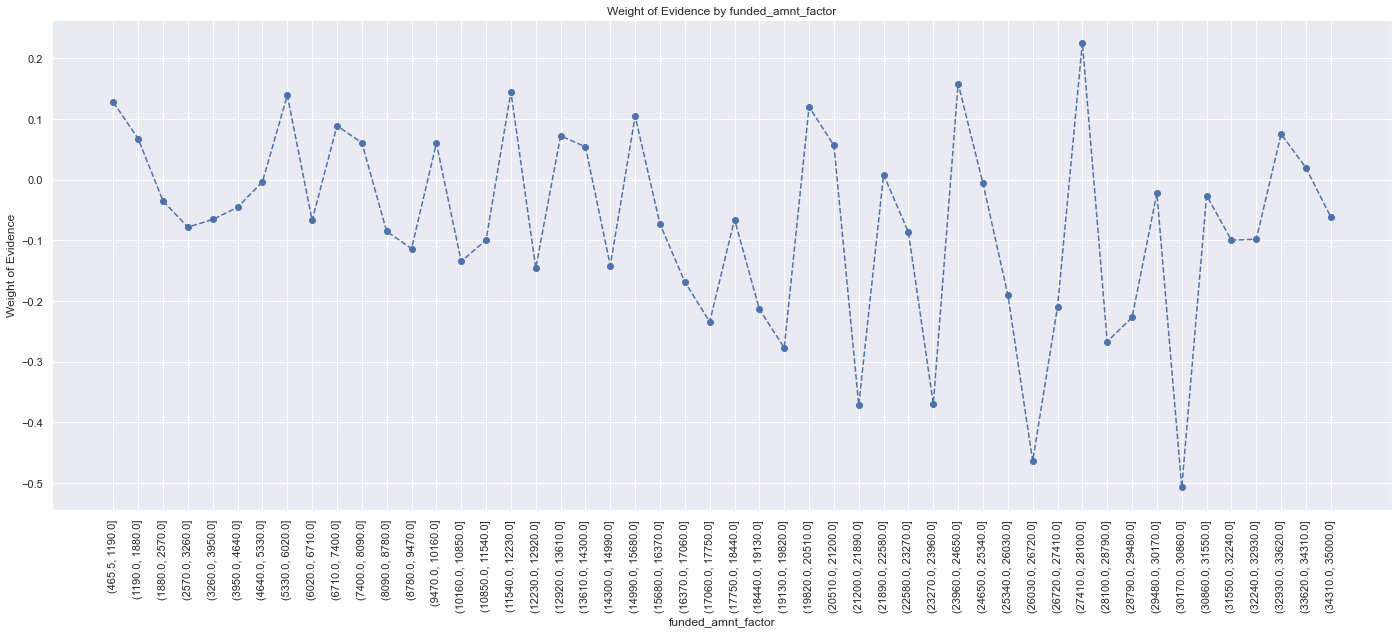

In [96]:
# visualize the weight of evidence by "funded_amnt"
plot_woe(temp, 'funded_amnt_factor', 'WoE', 90)

In [97]:
# the chart shows consecutive intervals for the variable have very different weights of evidence
# at the same time, it shows almost all these variations are around a trend that is almost horizontal
# there is no other clear pattern of dependance between the independante variables and weight of evidence
# in other words, weight of evidence varies greatly and there seems to be no association between "funded_amnt" and WoE
# this is sufficient reason not to use the "funded_amnt" variable in our PD model 

In [98]:
# next, we will preprocess other types of continuous variables
# some continuous variables, like annual income, may contain any value greater than zero, perhaps up to millions
# we will have to cut this kind of variables into categories
# let's start with annual income variable "annual_inc"
# divide the variable into 50 intervals
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# calculate the WoE of these intervals
temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  obs_prop    n_good    n_bad  \
0     (-5243.882, 144693.64]  351904   0.900839  0.943372  317009.0  34895.0   
1     (144693.64, 287491.28]   19004   0.934698  0.050945   17763.0   1241.0   
2     (287491.28, 430288.92]    1525   0.943607  0.004088    1439.0     86.0   
3     (430288.92, 573086.56]     332   0.942771  0.000890     313.0     19.0   
4      (573086.56, 715884.2]     112   0.901786  0.000300     101.0     11.0   
5      (715884.2, 858681.84]      65   0.907692  0.000174      59.0      6.0   
6    (858681.84, 1001479.48]      39   0.974359  0.000105      38.0      1.0   
7   (1001479.48, 1144277.12]      10   1.000000  0.000027      10.0      0.0   
8   (1144277.12, 1287074.76]      12   1.000000  0.000032      12.0      0.0   
9    (1287074.76, 1429872.4]       6   1.000000  0.000016       6.0      0.0   
10   (1429872.4, 1572670.04]       3   1.000000  0.000008       3.0      0.0   
11  (1572670.04, 1715467.68]       1   1.000000  0.000003       1.0      0.0   
12  (1715467.68, 1858265.32]       1   1.000000  0.000003       1.0      0.0   
13  (1858265.32, 2001062.96]       6   1.000000  0.000016       6.0      0.0   
14   (2001062.96, 2143860.6]       1   1.000000  0.000003       1.0      0.0   
15   (2143860.6, 2286658.24]       0        NaN  0.000000       NaN      NaN   
16  (2286658.24, 2429455.88]       0        NaN  0.000000       NaN      NaN   
17  (2429455.88, 2572253.52]       0        NaN  0.000000       NaN      NaN   
18  (2572253.52, 2715051.16]       0        NaN  0.000000       NaN      NaN   
19   (2715051.16, 2857848.8]       0        NaN  0.000000       NaN      NaN   
20   (2857848.8, 3000646.44]       0        NaN  0.000000       NaN      NaN   
21  (3000646.44, 3143444.08]       0        NaN  0.000000       NaN      NaN   
22  (3143444.08, 3286241.72]       0        NaN  0.000000       NaN      NaN   
23  (3286241.72, 3429039.36]       0        NaN  0.000000       NaN      NaN   
24   (3429039.36, 3571837.0]       0        NaN  0.000000       NaN      NaN   
25   (3571837.0, 3714634.64]       0        NaN  0.000000       NaN      NaN   
26  (3714634.64, 3857432.28]       0        NaN  0.000000       NaN      NaN   
27  (3857432.28, 4000229.92]       1   1.000000  0.000003       1.0      0.0   
28  (4000229.92, 4143027.56]       0        NaN  0.000000       NaN      NaN   
29   (4143027.56, 4285825.2]       0        NaN  0.000000       NaN      NaN   
30   (4285825.2, 4428622.84]       0        NaN  0.000000       NaN      NaN   
31  (4428622.84, 4571420.48]       1   1.000000  0.000003       1.0      0.0   
32  (4571420.48, 4714218.12]       0        NaN  0.000000       NaN      NaN   
33  (4714218.12, 4857015.76]       0        NaN  0.000000       NaN      NaN   
34   (4857015.76, 4999813.4]       1   1.000000  0.000003       1.0      0.0   
35   (4999813.4, 5142611.04]       1   1.000000  0.000003       1.0      0.0   
36  (5142611.04, 5285408.68]       0        NaN  0.000000       NaN      NaN   
37  (5285408.68, 5428206.32]       0        NaN  0.000000       NaN      NaN   
38  (5428206.32, 5571003.96]       0        NaN  0.000000       NaN      NaN   
39   (5571003.96, 5713801.6]       0        NaN  0.000000       NaN      NaN   
40   (5713801.6, 5856599.24]       0        NaN  0.000000       NaN      NaN   
41  (5856599.24, 5999396.88]       0        NaN  0.000000       NaN      NaN   
42  (5999396.88, 6142194.52]       2   1.000000  0.000005       2.0      0.0   
43  (6142194.52, 6284992.16]       0        NaN  0.000000       NaN      NaN   
44   (6284992.16, 6427789.8]       0        NaN  0.000000       NaN      NaN   
45   (6427789.8, 6570587.44]       0        NaN  0.000000       NaN      NaN   
46  (6570587.44, 6713385.08]       0        NaN  0.000000       NaN      NaN   
47  (6713385.08, 6856182.72]       0        NaN  0.000000       NaN      NaN   
48  (6856182.72, 6998980.36]       0        NaN  0.000000       NaN      NaN   
49   (69989

In [99]:
# it seems that the first interval out of 50 intervals makes up to 97% of the total of observations
# let's calculate the weight of evidence for 100 intervals and see how this proportion changes
# divide the variable into 100 intervals
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# calculate the WoE of these intervals
temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  obs_prop    n_good    n_bad  \
0      (-5243.882, 73294.82]  231445   0.889114  0.620449  205781.0  25664.0   
1      (73294.82, 144693.64]  120459   0.923368  0.322922  111228.0   9231.0   
2     (144693.64, 216092.46]   15885   0.934655  0.042584   14847.0   1038.0   
3     (216092.46, 287491.28]    3119   0.934915  0.008361    2916.0    203.0   
4      (287491.28, 358890.1]    1117   0.940913  0.002994    1051.0     66.0   
5      (358890.1, 430288.92]     408   0.950980  0.001094     388.0     20.0   
6     (430288.92, 501687.74]     245   0.951020  0.000657     233.0     12.0   
7     (501687.74, 573086.56]      87   0.919540  0.000233      80.0      7.0   
8     (573086.56, 644485.38]      61   0.901639  0.000164      55.0      6.0   
9      (644485.38, 715884.2]      51   0.901961  0.000137      46.0      5.0   
10     (715884.2, 787283.02]      37   0.945946  0.000099      35.0      2.0   
11    (787283.02, 858681.84]      28   0.857143  0.000075      24.0      4.0   
12    (858681.84, 930080.66]      17   1.000000  0.000046      17.0      0.0   
13   (930080.66, 1001479.48]      22   0.954545  0.000059      21.0      1.0   
14   (1001479.48, 1072878.3]       3   1.000000  0.000008       3.0      0.0   
15   (1072878.3, 1144277.12]       7   1.000000  0.000019       7.0      0.0   
16  (1144277.12, 1215675.94]       8   1.000000  0.000021       8.0      0.0   
17  (1215675.94, 1287074.76]       4   1.000000  0.000011       4.0      0.0   
18  (1287074.76, 1358473.58]       4   1.000000  0.000011       4.0      0.0   
19   (1358473.58, 1429872.4]       2   1.000000  0.000005       2.0      0.0   
20   (1429872.4, 1501271.22]       2   1.000000  0.000005       2.0      0.0   
21  (1501271.22, 1572670.04]       1   1.000000  0.000003       1.0      0.0   
22  (1572670.04, 1644068.86]       1   1.000000  0.000003       1.0      0.0   
23  (1644068.86, 1715467.68]       0        NaN  0.000000       NaN      NaN   
24   (1715467.68, 1786866.5]       1   1.000000  0.000003       1.0      0.0   
25   (1786866.5, 1858265.32]       0        NaN  0.000000       NaN      NaN   
26  (1858265.32, 1929664.14]       1   1.000000  0.000003       1.0      0.0   
27  (1929664.14, 2001062.96]       5   1.000000  0.000013       5.0      0.0   
28  (2001062.96, 2072461.78]       1   1.000000  0.000003       1.0      0.0   
29   (2072461.78, 2143860.6]       0        NaN  0.000000       NaN      NaN   
30   (2143860.6, 2215259.42]       0        NaN  0.000000       NaN      NaN   
31  (2215259.42, 2286658.24]       0        NaN  0.000000       NaN      NaN   
32  (2286658.24, 2358057.06]       0        NaN  0.000000       NaN      NaN   
33  (2358057.06, 2429455.88]       0        NaN  0.000000       NaN      NaN   
34   (2429455.88, 2500854.7]       0        NaN  0.000000       NaN      NaN   
35   (2500854.7, 2572253.52]       0        NaN  0.000000       NaN      NaN   
36  (2572253.52, 2643652.34]       0        NaN  0.000000       NaN      NaN   
37  (2643652.34, 2715051.16]       0        NaN  0.000000       NaN      NaN   
38  (2715051.16, 2786449.98]       0        NaN  0.000000       NaN      NaN   
39   (2786449.98, 2857848.8]       0        NaN  0.000000       NaN      NaN   
40   (2857848.8, 2929247.62]       0        NaN  0.000000       NaN      NaN   
41  (2929247.62, 3000646.44]       0        NaN  0.000000       NaN      NaN   
42  (3000646.44, 3072045.26]       0        NaN  0.000000       NaN      NaN   
43  (3072045.26, 3143444.08]       0        NaN  0.000000       NaN      NaN   
44   (3143444.08, 3214842.9]       0        NaN  0.000000       NaN      NaN   
45   (3214842.9, 3286241.72]       0        NaN  0.000000       NaN      NaN   
46  (3286241.72, 3357640.54]       0        NaN  0.000000       NaN      NaN   
47  (3357640.54, 3429039.36]       0        NaN  0.000000       NaN      NaN   
48  (3429039.36, 3500438.18]       0        NaN  0.000000       NaN      NaN   
49   (35004

In [100]:
# the first interval still has the highest number of observations with a proportion down to 88%
# the second interval has the second highest number of observations 
# this can be expected, there are a few people with high income and a lot of people with low income
# the idea here is to put aside people with very high income and investigate people with lower income separately
# the first two categories contain a lot of observations while the subsequent categories contain very few observations
# so the number of observations becomes lower and lower as we go into categories with higher income  
# we'll create one dummy variable for people with large income and figure out what dummy variables to create for people with lower income next
# the third category starts with the number 140000 so we assume that $140,000 is the threshold above which people are considered to have high income
# this means that the number of observations with very high income will include about 4% of total observations
# so we will create a category for people with income higher than $140,000
# now let's take a look at only the remaining observations with income lower than $140,000
# for convenience, let's store them in a dataframe
df_inputs_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]

# split the "annual_inc" variable into 50 categories
df_inputs_temp['annual_inc_factor'] = pd.cut(df_inputs_temp['annual_inc'], 50)

# the two lines of code below removes all rows with duplicate indices for the "df_inputs_temp" and "df_targets_prepr" dataframes
# if the WoE is calculated without removing the rows with duplicate indices we'll get errors  
# df_inputs_temp = df_inputs_temp[~df_inputs_temp.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]

# calculate the weight of evidence by annual income
temp = woe_continuous(df_inputs_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_temp.index])
temp

<ipython-input-100-cc5f38b68760>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['annual_inc_factor'] = pd.cut(df_inputs_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0      (1757.896, 4658.08]     15   0.800000  0.000043     12.0     3.0   
1       (4658.08, 7420.16]     40   0.750000  0.000114     30.0    10.0   
2      (7420.16, 10182.24]    287   0.888502  0.000818    255.0    32.0   
3     (10182.24, 12944.32]    547   0.831810  0.001558    455.0    92.0   
4      (12944.32, 15706.4]   1210   0.839669  0.003447   1016.0   194.0   
5      (15706.4, 18468.48]   1522   0.864652  0.004335   1316.0   206.0   
6     (18468.48, 21230.56]   2928   0.868169  0.008340   2542.0   386.0   
7     (21230.56, 23992.64]   2495   0.859319  0.007107   2144.0   351.0   
8     (23992.64, 26754.72]   7016   0.864595  0.019985   6066.0   950.0   
9      (26754.72, 29516.8]   5643   0.875775  0.016074   4942.0   701.0   
10     (29516.8, 32278.88]  11915   0.872933  0.033940  10401.0  1514.0   
11    (32278.88, 35040.96]  12241   0.876236  0.034868  10726.0  1515.0   
12    (35040.96, 37803.04]   7905   0.873624  0.022517   6906.0   999.0   
13    (37803.04, 40565.12]  17910   0.879676  0.051017  15755.0  2155.0   
14     (40565.12, 43327.2]  12508   0.883115  0.035629  11046.0  1462.0   
15     (43327.2, 46089.28]  16590   0.886679  0.047257  14710.0  1880.0   
16    (46089.28, 48851.36]   9878   0.889046  0.028137   8782.0  1096.0   
17    (48851.36, 51613.44]  19024   0.891505  0.054190  16960.0  2064.0   
18    (51613.44, 54375.52]  12766   0.899734  0.036364  11486.0  1280.0   
19     (54375.52, 57137.6]  16153   0.900266  0.046012  14542.0  1611.0   
20     (57137.6, 59899.68]   6482   0.900494  0.018464   5837.0   645.0   
21    (59899.68, 62661.76]  21299   0.894080  0.060670  19043.0  2256.0   
22    (62661.76, 65423.84]  16090   0.902300  0.045832  14518.0  1572.0   
23    (65423.84, 68185.92]   7942   0.908335  0.022623   7214.0   728.0   
24     (68185.92, 70948.0]  12982   0.905639  0.036979  11757.0  1225.0   
25     (70948.0, 73710.08]   8385   0.908050  0.023885   7614.0   771.0   
26    (73710.08, 76472.16]  13145   0.912895  0.037444  12000.0  1145.0   
27    (76472.16, 79234.24]   5679   0.914598  0.016177   5194.0   485.0   
28    (79234.24, 81996.32]  11397   0.914539  0.032464  10423.0   974.0   
29     (81996.32, 84758.4]   6063   0.924295  0.017270   5604.0   459.0   
30     (84758.4, 87520.48]   9980   0.918236  0.028428   9164.0   816.0   
31    (87520.48, 90282.56]  10393   0.918310  0.029604   9544.0   849.0   
32    (90282.56, 93044.64]   4337   0.926447  0.012354   4018.0   319.0   
33    (93044.64, 95806.72]   5634   0.922080  0.016048   5195.0   439.0   
34     (95806.72, 98568.8]   4667   0.919649  0.013294   4292.0   375.0   
35    (98568.8, 101330.88]   8793   0.925509  0.025047   8138.0   655.0   
36  (101330.88, 104092.96]   3232   0.932240  0.009206   3013.0   219.0   
37  (104092.96, 106855.04]   3736   0.934422  0.010642   3491.0   245.0   
38  (106855.04, 109617.12]   2277   0.933245  0.006486   2125.0   152.0   
39   (109617.12, 112379.2]   5714   0.925971  0.016276   5291.0   423.0   
40   (112379.2, 115141.28]   3218   0.947483  0.009166   3049.0   169.0   
41  (115141.28, 117903.36]   1128   0.931738  0.003213   1051.0    77.0   
42  (117903.36, 120665.44]   6228   0.924374  0.017740   5757.0   471.0   
43  (120665.44, 123427.52]   1043   0.946309  0.002971    987.0    56.0   
44   (123427.52, 126189.6]   3566   0.931576  0.010158   3322.0   244.0   
45   (126189.6, 128951.68]    791   0.927939  0.002253    734.0    57.0   
46  (128951.68, 131713.76]   3033   0.939993  0.008639   2851.0   182.0   
47  (131713.76, 134475.84]    801   0.925094  0.002282    741.0    60.0   
48  (134475.84, 137237.92]   1902   0.949527  0.005418   1806.0    96.0   
49   (137237.92, 140000.0]   2532   0.934439  0.007212   2366.0   166.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.000038    0.000086 -0.819671             NaN       NaN    0.053005  
1      0.000095    0.000287

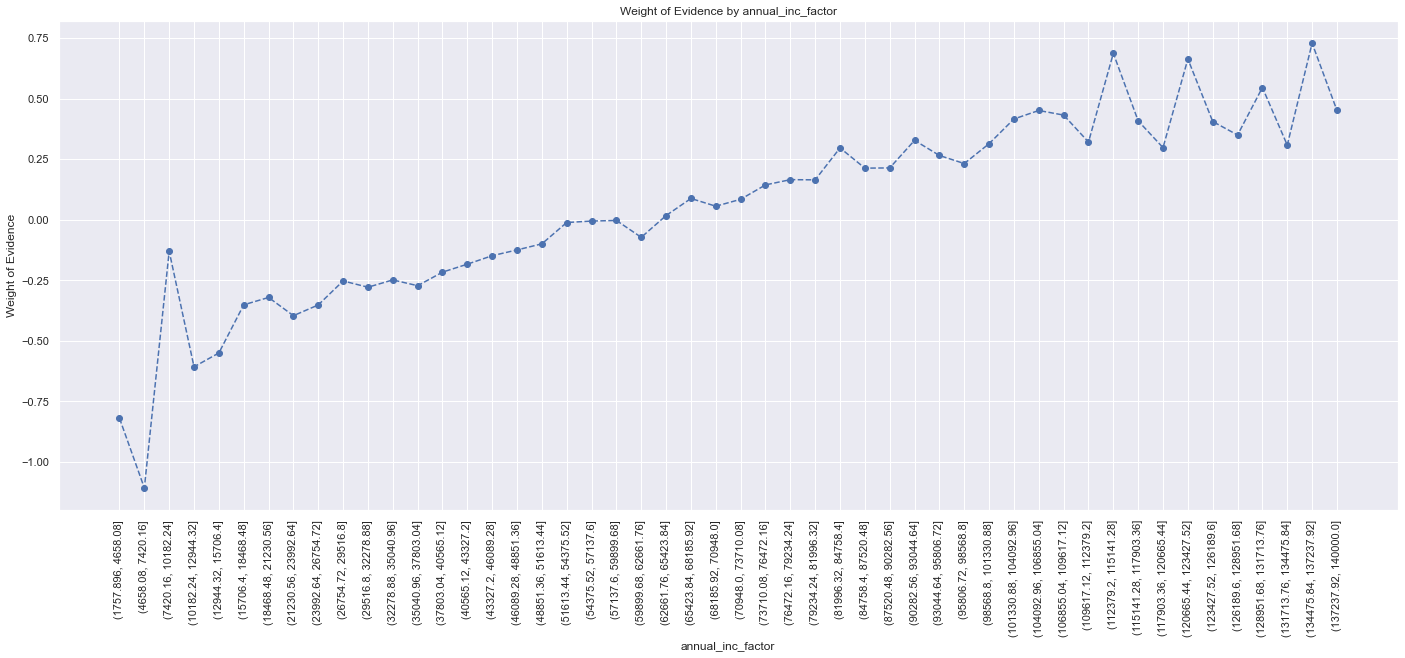

In [101]:
# viualize the WoE by annual income
plot_woe(temp, 'annual_inc_factor', 'WoE', 90)

In [102]:
# what we see here, is that the WoE increases almost monotonically with annual income
# we can split the variable into some roughly equal intervals 
# taking into consideration the number of observations I have split the variable with intervals of $10,000 or $20,000 each  
# below is the relevant code 
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [103]:
df_inputs_prepr.shape

(373028, 260)

In [104]:
# now let's face the issue of missing values
# I created a dummy variable indicating that the value of the original variable is missing:
# 1: when the value is missing and 2: when the value is not missing
# first I stored the not missing value in a separate dataframe, this carried out on the "mths_since_last_delinq"
df_inputs_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

# now let's do some fine classing
df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)

# calculate the weight of evidence by months since last delinquency
df_temp = woe_continuous(df_inputs_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_temp.index])
df_temp

<ipython-input-104-ef6dc040bb76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_temp['mths_since_last_delinq'], 50)
C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0                 (-0.188, 3.76]   5277   0.884025  0.030531   4665.0   612.0   
1                   (3.76, 7.52]  11167   0.902928  0.064608  10083.0  1084.0   
2                  (7.52, 11.28]  13306   0.908237  0.076983  12085.0  1221.0   
3                 (11.28, 15.04]  13216   0.903223  0.076462  11937.0  1279.0   
4                  (15.04, 18.8]   9337   0.907786  0.054020   8476.0   861.0   
5                  (18.8, 22.56]  11641   0.906623  0.067350  10554.0  1087.0   
6                 (22.56, 26.32]  10887   0.908698  0.062988   9893.0   994.0   
7                 (26.32, 30.08]  10560   0.907197  0.061096   9580.0   980.0   
8                 (30.08, 33.84]   7576   0.914203  0.043832   6926.0   650.0   
9                  (33.84, 37.6]   9795   0.910873  0.056670   8922.0   873.0   
10                 (37.6, 41.36]   9352   0.903764  0.054107   8452.0   900.0   
11                (41.36, 45.12]   9202   0.908172  0.053239   8357.0   845.0   
12                (45.12, 48.88]   6538   0.911135  0.037826   5957.0   581.0   
13                (48.88, 52.64]   6486   0.903793  0.037525   5862.0   624.0   
14                 (52.64, 56.4]   6045   0.906865  0.034974   5482.0   563.0   
15                 (56.4, 60.16]   5867   0.912903  0.033944   5356.0   511.0   
16                (60.16, 63.92]   4040   0.898020  0.023374   3628.0   412.0   
17                (63.92, 67.68]   5314   0.904968  0.030745   4809.0   505.0   
18                (67.68, 71.44]   5141   0.904104  0.029744   4648.0   493.0   
19                 (71.44, 75.2]   4950   0.899798  0.028639   4454.0   496.0   
20                 (75.2, 78.96]   3312   0.908213  0.019162   3008.0   304.0   
21                (78.96, 82.72]   3577   0.901034  0.020695   3223.0   354.0   
22                (82.72, 86.48]     94   0.829787  0.000544     78.0    16.0   
23                (86.48, 90.24]     38   0.894737  0.000220     34.0     4.0   
24                 (90.24, 94.0]     32   0.937500  0.000185     30.0     2.0   
25                 (94.0, 97.76]     20   0.750000  0.000116     15.0     5.0   
26               (97.76, 101.52]     13   0.923077  0.000075     12.0     1.0   
27              (101.52, 105.28]     11   0.909091  0.000064     10.0     1.0   
28              (105.28, 109.04]      8   0.750000  0.000046      6.0     2.0   
29               (109.04, 112.8]      2   0.500000  0.000012      1.0     1.0   
30               (112.8, 116.56]      7   0.857143  0.000040      6.0     1.0   
31              (116.56, 120.32]      2   1.000000  0.000012      2.0     0.0   
32              (120.32, 124.08]      1   1.000000  0.000006      1.0     0.0   
33              (124.08, 127.84]      2   1.000000  0.000012      2.0     0.0   
34               (127.84, 131.6]      5   1.000000  0.000029      5.0     0.0   
35               (131.6, 135.36]      7   0.857143  0.000040      6.0     1.0   
36              (135.36, 139.12]      2   1.000000  0.000012      2.0     0.0   
37              (139.12, 142.88]      3   1.000000  0.000017      3.0     0.0   
38              (142.88, 146.64]      1   1.000000  0.000006      1.0     0.0   
39               (146.64, 150.4]      3   0.666667  0.000017      2.0     1.0   
40               (150.4, 154.16]      2   0.500000  0.000012      1.0     1.0   
41              (154.16, 157.92]      1   1.000000  0.000006      1.0     0.0   
42              (157.92, 161.68]      1   1.000000  0.000006      1.0     0.0   
43              (161.68, 165.44]      0        NaN  0.000000      NaN     NaN   
44               (165.44, 169.2]      0        NaN  0.000000      NaN     NaN   
45               (169.2, 172.96]      0        NaN  0.000000      NaN     NaN   
46              (172.96, 176.72]      0        NaN  0.000000      NaN     NaN   
47              (176.72, 180.48]      1   1.000000  0.000006      1.0     0.0   
48              (180.48, 184.24]  

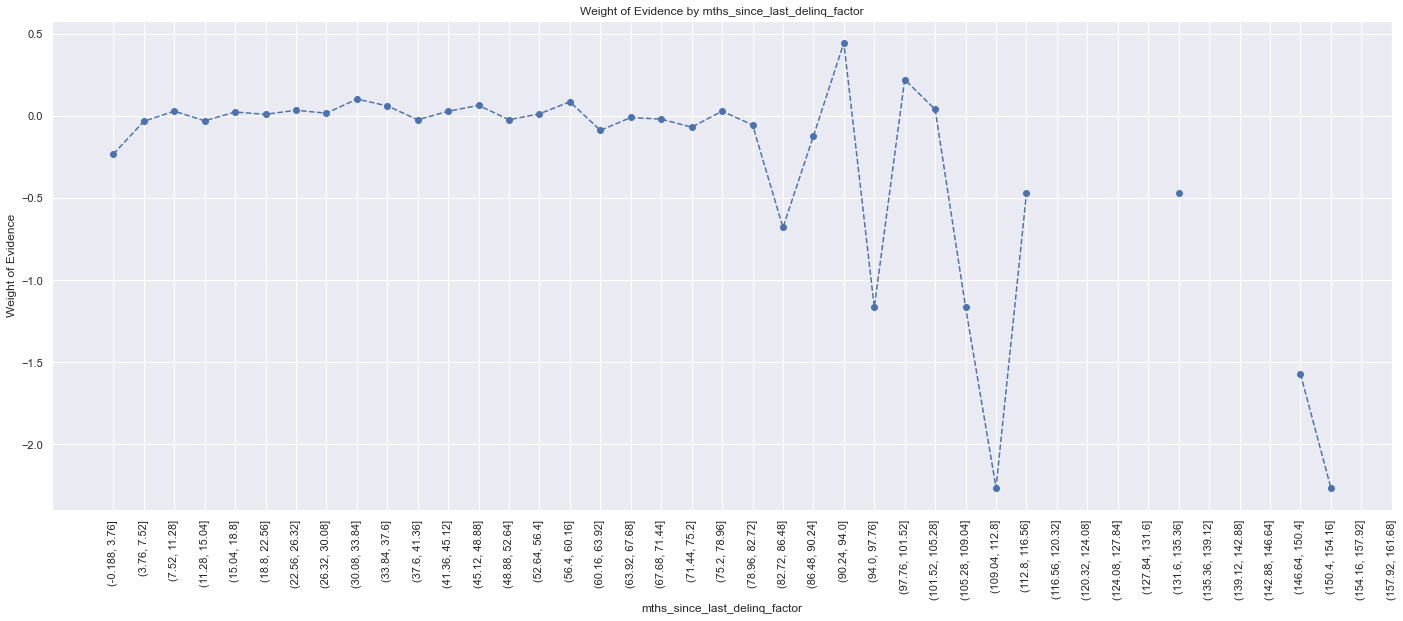

In [105]:
# visualize the WoE by "mths_since_last_delinq"
plot_woe(df_temp, 'mths_since_last_delinq_factor', 'WoE', 90)

In [106]:
# again we will use the np.where() method to create some dummy variables
# below is the relevant code
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [107]:
df_inputs_prepr.shape

(373028, 265)

In [108]:
# the next variable to deal with is the the debt-to-income ratio variable "dti" that will be preprocessed as the "annual_inc" variable
# let's split the variable into 50 categories
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0       (-0.04, 0.8]   1553   0.902125  0.004163   1401.0   152.0   
1         (0.8, 1.6]   1965   0.901781  0.005268   1772.0   193.0   
2       (1.6, 2.399]   2509   0.915106  0.006726   2296.0   213.0   
3     (2.399, 3.199]   3234   0.917440  0.008670   2967.0   267.0   
4     (3.199, 3.999]   4124   0.917071  0.011055   3782.0   342.0   
5     (3.999, 4.799]   5037   0.923367  0.013503   4651.0   386.0   
6     (4.799, 5.599]   5989   0.917348  0.016055   5494.0   495.0   
7     (5.599, 6.398]   6781   0.924790  0.018178   6271.0   510.0   
8     (6.398, 7.198]   7665   0.920287  0.020548   7054.0   611.0   
9     (7.198, 7.998]   8747   0.923059  0.023449   8074.0   673.0   
10    (7.998, 8.798]   9572   0.921855  0.025660   8824.0   748.0   
11    (8.798, 9.598]  10320   0.917151  0.027665   9465.0   855.0   
12   (9.598, 10.397]  11092   0.917869  0.029735  10181.0   911.0   
13  (10.397, 11.197]  11940   0.911474  0.032008  10883.0  1057.0   
14  (11.197, 11.997]  12471   0.917649  0.033432  11444.0  1027.0   
15  (11.997, 12.797]  13246   0.912200  0.035509  12083.0  1163.0   
16  (12.797, 13.597]  13436   0.912995  0.036019  12267.0  1169.0   
17  (13.597, 14.396]  13709   0.910351  0.036751  12480.0  1229.0   
18  (14.396, 15.196]  14045   0.912282  0.037651  12813.0  1232.0   
19  (15.196, 15.996]  13870   0.908435  0.037182  12600.0  1270.0   
20  (15.996, 16.796]  13735   0.903458  0.036820  12409.0  1326.0   
21  (16.796, 17.596]  13710   0.900802  0.036753  12350.0  1360.0   
22  (17.596, 18.395]  13606   0.897839  0.036474  12216.0  1390.0   
23  (18.395, 19.195]  13209   0.899235  0.035410  11878.0  1331.0   
24  (19.195, 19.995]  13183   0.896078  0.035341  11813.0  1370.0   
25  (19.995, 20.795]  12435   0.895456  0.033335  11135.0  1300.0   
26  (20.795, 21.595]  11902   0.891111  0.031906  10606.0  1296.0   
27  (21.595, 22.394]  11303   0.889056  0.030301  10049.0  1254.0   
28  (22.394, 23.194]  11013   0.888314  0.029523   9783.0  1230.0   
29  (23.194, 23.994]  10229   0.889823  0.027422   9102.0  1127.0   
30  (23.994, 24.794]   9922   0.884600  0.026599   8777.0  1145.0   
31  (24.794, 25.594]   8566   0.890614  0.022963   7629.0   937.0   
32  (25.594, 26.393]   7777   0.891603  0.020848   6934.0   843.0   
33  (26.393, 27.193]   7251   0.886361  0.019438   6427.0   824.0   
34  (27.193, 27.993]   6627   0.881394  0.017765   5841.0   786.0   
35  (27.993, 28.793]   6361   0.886024  0.017052   5636.0   725.0   
36  (28.793, 29.593]   5785   0.881590  0.015508   5100.0   685.0   
37  (29.593, 30.392]   4705   0.882040  0.012613   4150.0   555.0   
38  (30.392, 31.192]   3852   0.880322  0.010326   3391.0   461.0   
39  (31.192, 31.992]   3510   0.890028  0.009409   3124.0   386.0   
40  (31.992, 32.792]   3041   0.882276  0.008152   2683.0   358.0   
41  (32.792, 33.592]   2811   0.884739  0.007536   2487.0   324.0   
42  (33.592, 34.391]   2592   0.883488  0.006949   2290.0   302.0   
43  (34.391, 35.191]   1842   0.880022  0.004938   1621.0   221.0   
44  (35.191, 35.991]    530   0.932075  0.001421    494.0    36.0   
45  (35.991, 36.791]    539   0.918367  0.001445    495.0    44.0   
46  (36.791, 37.591]    491   0.906314  0.001316    445.0    46.0   
47   (37.591, 38.39]    442   0.923077  0.001185    408.0    34.0   
48    (38.39, 39.19]    385   0.914286  0.001032    352.0    33.0   
49    (39.19, 39.99]    369   0.926829  0.000989    342.0    27.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.004160    0.004192 -0.007649             NaN       NaN    0.023004  
1      0.005262    0.005323 -0.011536        0.000344  0.003887    0.023004  
2      0.006818    0.005874  0.148922        0.013324  0.160458    0.023004  
3      0.008810    0.007364  0.179348        0.002334  0.030426    0.023004  
4      0.011230    0.009432  0.174488        0.000369  0.004860    0.023004  
5      0.013811    0.0

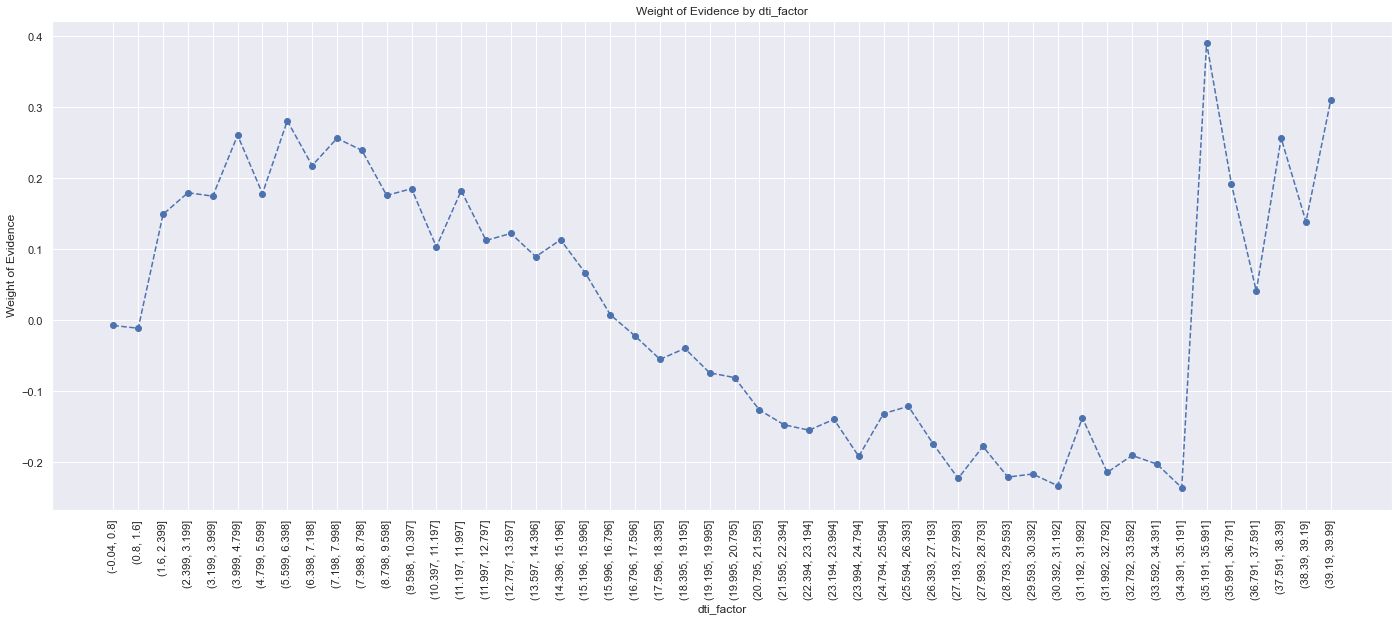

In [109]:
# visualize the weight of evidence by debt-to-income ratio
plot_woe(df_temp, 'dti_factor', 'WoE', 90)

In [110]:
# the first interval has the lowest WoE so it will have its own dummy variable and will be the reference category
# below is the relevant code
df_inputs_prepr['dti: <= 1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti: 1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti: 3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti: 7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti: 10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti: 16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti: 20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti: 21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti: 22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti: > 35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [111]:
df_inputs_prepr.shape

(373028, 276)

In [112]:
# one more variable to preprocess is the "mths_since_last_record" 
# first I stored the not missing value in a separate dataframe, this carried out on the "mths_since_last_delinq"
df_inputs_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# then let's cut this variable into 50 categories
df_inputs_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 50)

# calculate the weight of evidence by "mths_since_last_record"
df_temp = woe_continuous(df_inputs_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_temp.index])
df_temp

<ipython-input-112-195f97fa95d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr['mths_since_last_record'], 50)


mths_since_last_record_factor  n_obs  prop_good  obs_prop  n_good  n_bad  \
0                 (-0.121, 2.42]   1086   0.764273  0.021691   830.0  256.0   
1                   (2.42, 4.84]     76   0.921053  0.001518    70.0    6.0   
2                   (4.84, 7.26]    163   0.938650  0.003256   153.0   10.0   
3                   (7.26, 9.68]    156   0.929487  0.003116   145.0   11.0   
4                   (9.68, 12.1]    292   0.924658  0.005832   270.0   22.0   
5                  (12.1, 14.52]    207   0.932367  0.004134   193.0   14.0   
6                 (14.52, 16.94]    210   0.942857  0.004194   198.0   12.0   
7                 (16.94, 19.36]    334   0.916168  0.006671   306.0   28.0   
8                 (19.36, 21.78]    283   0.932862  0.005652   264.0   19.0   
9                  (21.78, 24.2]    455   0.916484  0.009088   417.0   38.0   
10                 (24.2, 26.62]    339   0.917404  0.006771   311.0   28.0   
11                (26.62, 29.04]    612   0.918301  0.012224   562.0   50.0   
12                (29.04, 31.46]    451   0.920177  0.009008   415.0   36.0   
13                (31.46, 33.88]    487   0.940452  0.009727   458.0   29.0   
14                 (33.88, 36.3]    780   0.932051  0.015579   727.0   53.0   
15                 (36.3, 38.72]    659   0.948407  0.013162   625.0   34.0   
16                (38.72, 41.14]   1008   0.936508  0.020133   944.0   64.0   
17                (41.14, 43.56]    812   0.944581  0.016218   767.0   45.0   
18                (43.56, 45.98]    791   0.939317  0.015799   743.0   48.0   
19                 (45.98, 48.4]   1316   0.938450  0.026285  1235.0   81.0   
20                 (48.4, 50.82]    945   0.933333  0.018875   882.0   63.0   
21                (50.82, 53.24]   1536   0.927083  0.030679  1424.0  112.0   
22                (53.24, 55.66]   1062   0.929379  0.021212   987.0   75.0   
23                (55.66, 58.08]   1662   0.935018  0.033196  1554.0  108.0   
24                 (58.08, 60.5]   1095   0.926941  0.021871  1015.0   80.0   
25                 (60.5, 62.92]   1213   0.919209  0.024228  1115.0   98.0   
26                (62.92, 65.34]   1631   0.924586  0.032576  1508.0  123.0   
27                (65.34, 67.76]   1088   0.932904  0.021731  1015.0   73.0   
28                (67.76, 70.18]   1513   0.925975  0.030220  1401.0  112.0   
29                 (70.18, 72.6]   1041   0.923151  0.020792   961.0   80.0   
30                 (72.6, 75.02]   1420   0.913380  0.028362  1297.0  123.0   
31                (75.02, 77.44]    946   0.911205  0.018895   862.0   84.0   
32                (77.44, 79.86]    939   0.916933  0.018755   861.0   78.0   
33                (79.86, 82.28]   1351   0.905996  0.026984  1224.0  127.0   
34                 (82.28, 84.7]    724   0.912983  0.014461   661.0   63.0   
35                 (84.7, 87.12]   1350   0.868889  0.026964  1173.0  177.0   
36                (87.12, 89.54]    822   0.878345  0.016418   722.0  100.0   
37                (89.54, 91.96]    904   0.875000  0.018056   791.0  113.0   
38                (91.96, 94.38]   1492   0.873995  0.029800  1304.0  188.0   
39                 (94.38, 96.8]   1145   0.861135  0.022869   986.0  159.0   
40                 (96.8, 99.22]   1821   0.896211  0.036371  1632.0  189.0   
41               (99.22, 101.64]   1258   0.880763  0.025126  1108.0  150.0   
42              (101.64, 104.06]   2096   0.896947  0.041864  1880.0  216.0   
43              (104.06, 106.48]   1536   0.893229  0.030679  1372.0  164.0   
44               (106.48, 108.9]   1559   0.905709  0.031138  1412.0  147.0   
45               (108.9, 111.32]   2296   0.899826  0.045859  2066.0  230.0   
46              (111.32, 113.74]   1461   0.900753  0.029181  1316.0  145.0   
47              (113.74, 116.16]   2037   0.880707  0.040685  1794.0  243.0   
48              (116.16, 118.58]   1236   0.915049  0.024687  1131.0  105.0   
49               (118.58, 121.0]    371   0.889488  0

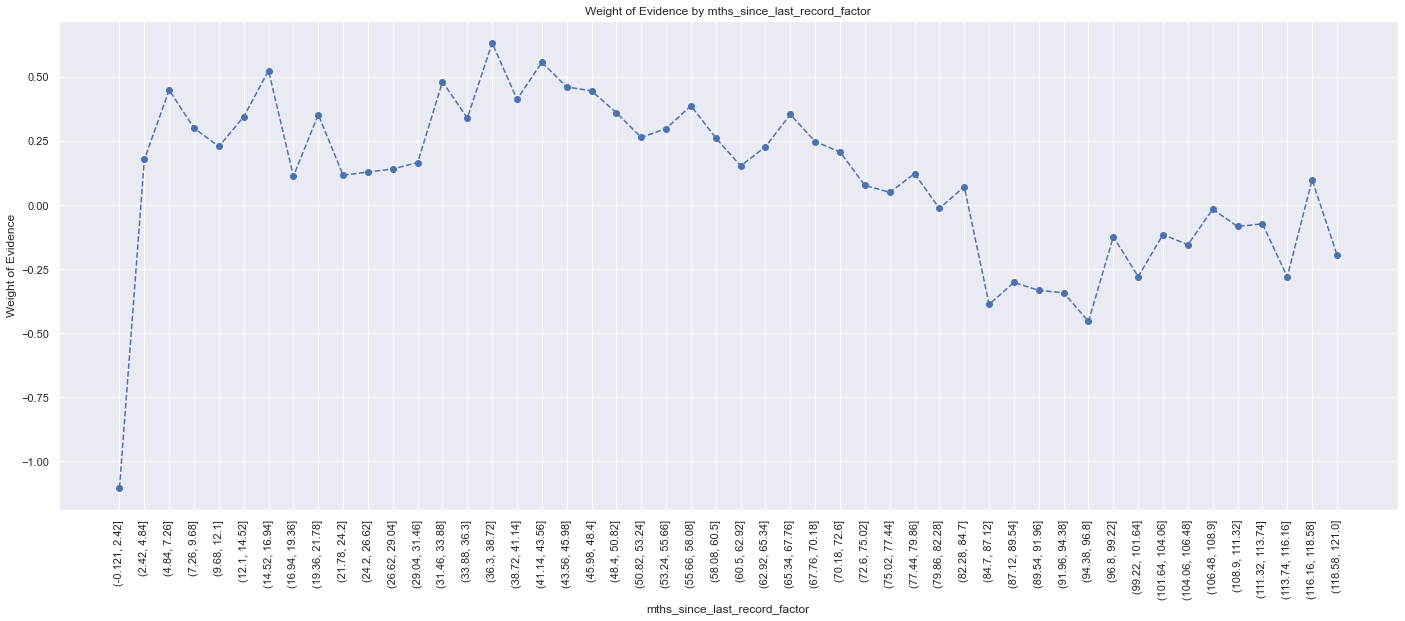

In [113]:
plot_woe(df_temp, 'mths_since_last_record_factor', 'WoE', 90)

In [114]:
# the first interval has the lowest WoE so it will have its own dummy variable
# below is the relevant code
df_inputs_prepr['mths_since_last_record: Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record: 0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record: 3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record: 21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record: 32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record: 81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record: > 86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [115]:
# print the unique values of the "mths_since_earliest_cr_line" column
df_inputs_prepr['mth_since_earliest_cr_line'].unique()

array([372., 240., 317., 230., 233., 214., 155., 194., 165., 239., 169.,
       237., 398., 173., 175., 110., 202., 184.,  93., 204., 218., 255.,
       152., 103., 276., 215., 326., 289., 187., 180., 186., 306., 164.,
       304., 192., 235., 244., 181., 114., 312., 190., 212., 157., 229.,
       273., 405., 185., 148., 261., 147., 234., 242.,  99., 243., 158.,
       178., 277., 168., 197., 142., 136., 223., 129., 412., 256., 150.,
       254., 106., 464., 128., 266., 272., 236., 296., 288., 346., 163.,
       156., 587., 251., 222., 300., 122., 268., 205., 219., 335., 231.,
       310., 135., 432., 303., 172., 313., 258., 138., 151., 259., 220.,
       166., 143., 499., 260., 225., 389., 241., 191., 213., 224., 249.,
       488., 332., 161., 141., 353., 357., 413., 322., 227., 302., 195.,
       200., 246., 159., 117., 275., 299., 318., 182., 497., 356., 217.,
       104., 339., 278., 348., 325., 507., 331., 257., 221., 414., 247.,
       267., 102., 291., 384., 179.,  79., 193., 25

In [116]:
# the next variable to deal with is the "mth_since_earliest_cr_line" 
# let's split the variable into 50 categories
df_inputs_prepr['mth_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mth_since_earliest_cr_line'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'mth_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mth_since_earliest_cr_line_factor  n_obs  prop_good  obs_prop   n_good  \
0                    (-0.587, 11.74]     24   0.875000  0.000064     21.0   
1                     (11.74, 23.48]      0        NaN  0.000000      NaN   
2                     (23.48, 35.22]      0        NaN  0.000000      NaN   
3                     (35.22, 46.96]      0        NaN  0.000000      NaN   
4                      (46.96, 58.7]      0        NaN  0.000000      NaN   
5                      (58.7, 70.44]      0        NaN  0.000000      NaN   
6                     (70.44, 82.18]    722   0.925208  0.001936    668.0   
7                     (82.18, 93.92]   1929   0.900985  0.005171   1738.0   
8                    (93.92, 105.66]   2817   0.878949  0.007552   2476.0   
9                    (105.66, 117.4]   5092   0.889238  0.013650   4528.0   
10                   (117.4, 129.14]   9217   0.879245  0.024709   8104.0   
11                  (129.14, 140.88]  11701   0.878899  0.031368  10284.0   
12                  (140.88, 152.62]  13568   0.888709  0.036373  12058.0   
13                  (152.62, 164.36]  16266   0.893643  0.043605  14536.0   
14                   (164.36, 176.1]  19391   0.897684  0.051983  17407.0   
15                   (176.1, 187.84]  20434   0.899432  0.054779  18379.0   
16                  (187.84, 199.58]  26096   0.896957  0.069957  23407.0   
17                  (199.58, 211.32]  28421   0.897118  0.076190  25497.0   
18                  (211.32, 223.06]  27027   0.898620  0.072453  24287.0   
19                   (223.06, 234.8]  21901   0.898680  0.058711  19682.0   
20                   (234.8, 246.54]  19682   0.901585  0.052763  17745.0   
21                  (246.54, 258.28]  18090   0.905970  0.048495  16389.0   
22                  (258.28, 270.02]  17958   0.906114  0.048141  16272.0   
23                  (270.02, 281.76]  14875   0.912403  0.039876  13572.0   
24                   (281.76, 293.5]  14211   0.912462  0.038096  12967.0   
25                   (293.5, 305.24]  10240   0.917676  0.027451   9397.0   
26                  (305.24, 316.98]   7616   0.917017  0.020417   6984.0   
27                  (316.98, 328.72]   8603   0.912821  0.023063   7853.0   
28                  (328.72, 340.46]   8307   0.918864  0.022269   7633.0   
29                   (340.46, 352.2]   7243   0.914400  0.019417   6623.0   
30                   (352.2, 363.94]   5532   0.920282  0.014830   5091.0   
31                  (363.94, 375.68]   5446   0.918472  0.014599   5002.0   
32                  (375.68, 387.42]   4640   0.923060  0.012439   4283.0   
33                  (387.42, 399.16]   4203   0.921247  0.011267   3872.0   
34                   (399.16, 410.9]   3494   0.914711  0.009367   3196.0   
35                   (410.9, 422.64]   3068   0.918188  0.008225   2817.0   
36                  (422.64, 434.38]   2283   0.920718  0.006120   2102.0   
37                  (434.38, 446.12]   1788   0.938479  0.004793   1678.0   
38                  (446.12, 457.86]   1481   0.918298  0.003970   1360.0   
39                   (457.86, 469.6]   1612   0.918734  0.004321   1481.0   
40                   (469.6, 481.34]   1582   0.920986  0.004241   1457.0   
41                  (481.34, 493.08]   1248   0.921474  0.003346   1150.0   
42                  (493.08, 504.82]    849   0.926973  0.002276    787.0   
43                  (504.82, 516.56]    762   0.919948  0.002043    701.0   
44                   (516.56, 528.3]    642   0.917445  0.001721    589.0   
45                   (528.3, 540.04]    580   0.922414  0.001555    535.0   
46                  (540.04, 551.78]    471   0.921444  0.001263    434.0   
47                  (551.78, 563.52]    339   0.917404  0.000909    311.0   
48                  (563.52, 575.26]    347   0.902017  0.000930    313.0   
49                   (575.26, 587.0]   1230   0.896748  0.003297   1103.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \


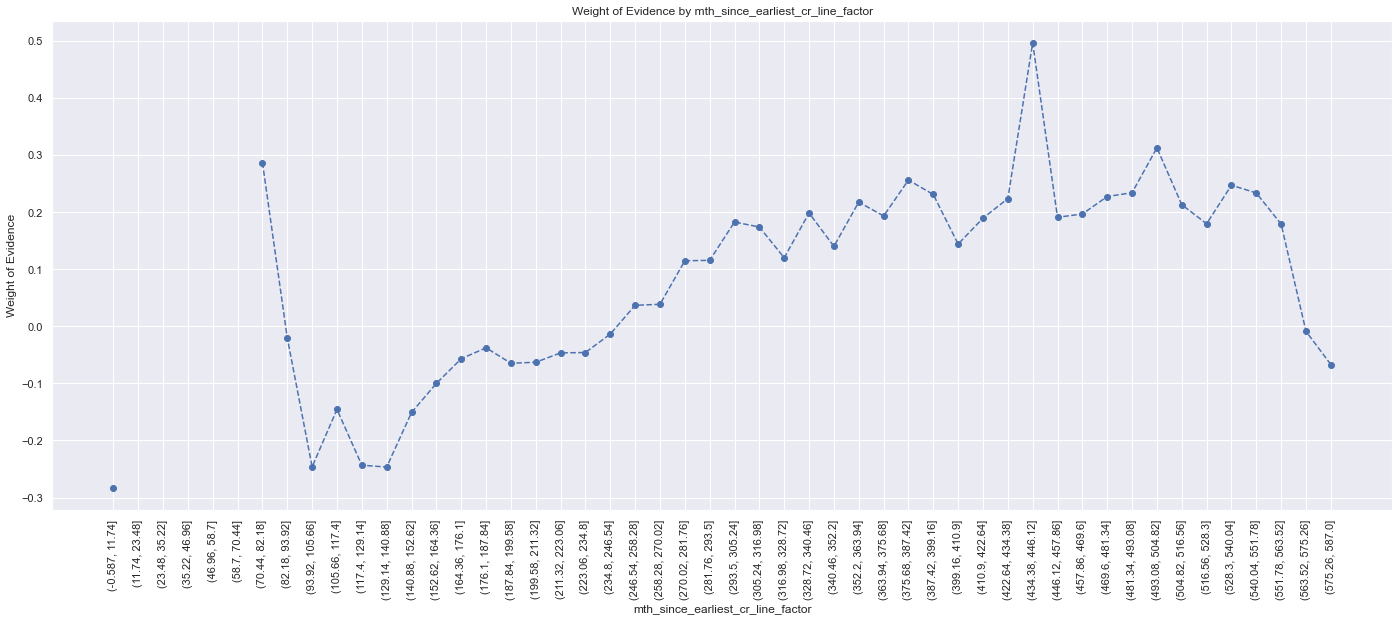

In [117]:
# visualize the weight of evidence by "mth_since_earliest_cr_line"
plot_woe(df_temp, 'mth_since_earliest_cr_line_factor', 'WoE', 90)

In [118]:
# we create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mth_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mth_since_earliest_cr_line'].max()))), 1, 0)

In [123]:
# print the unique value of the "delinq_2yrs" variable
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [124]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
0           0.0  306417   0.902120  0.821432  276425.0  29992.0     0.820815   
1           1.0   44927   0.906693  0.120439   40735.0   4192.0     0.120958   
2           2.0   13118   0.904787  0.035166   11869.0   1249.0     0.035244   
3           3.0    4550   0.901758  0.012197    4103.0    447.0     0.012183   
4           4.0    1868   0.910600  0.005008    1701.0    167.0     0.005051   
5           5.0     966   0.894410  0.002590     864.0    102.0     0.002566   
6           6.0     501   0.922156  0.001343     462.0     39.0     0.001372   
7           7.0     279   0.885305  0.000748     247.0     32.0     0.000733   
8           8.0     148   0.932432  0.000397     138.0     10.0     0.000410   
9           9.0      89   0.898876  0.000239      80.0      9.0     0.000238   
10         10.0      56   0.910714  0.000150      51.0      5.0     0.000151   
11         11.0      31   0.903226  0.000083      28.0      3.0     0.000083   
12         12.0      30   0.766667  0.000080      23.0      7.0     0.000068   
13         13.0      18   0.944444  0.000048      17.0      1.0     0.000050   
14         14.0       6   0.833333  0.000016       5.0      1.0     0.000015   
15         15.0       6   0.833333  0.000016       5.0      1.0     0.000015   
16         16.0       4   1.000000  0.000011       4.0      0.0     0.000012   
17         17.0       3   0.666667  0.000008       2.0      1.0     0.000006   
18         18.0       3   0.666667  0.000008       2.0      1.0     0.000006   
19         19.0       2   1.000000  0.000005       2.0      0.0     0.000006   
20         21.0       2   1.000000  0.000005       2.0      0.0     0.000006   
21         22.0       2   1.000000  0.000005       2.0      0.0     0.000006   
22         24.0       1   1.000000  0.000003       1.0      0.0     0.000003   
23         29.0       1   1.000000  0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0     0.827160 -0.007701             NaN       NaN         inf  
1     0.115613  0.045200        0.004573  0.052901         inf  
2     0.034447  0.022877        0.001906  0.022323         inf  
3     0.012328 -0.011795        0.003029  0.034672         inf  
4     0.004606  0.092268        0.008841  0.104063         inf  
5     0.002813 -0.092110        0.016190  0.184378         inf  
6     0.001076  0.243294        0.027746  0.335403         inf  
7     0.000883 -0.185057        0.036851  0.428351         inf  
8     0.000276  0.395959        0.047128  0.581016         inf  
9     0.000248 -0.043908        0.033556  0.439867         inf  
10    0.000138  0.093678        0.011838  0.137586         inf  
11    0.000083  0.004883        0.007488  0.088795         inf  
12    0.000193 -1.039126        0.136559  1.044008         inf  
13    0.000028  0.604504        0.177778  1.643629         inf  
14    0.000028 -0.619272        0.111111  1.223775         inf  
15    0.000028 -0.619272        0.000000  0.000000         inf  
16    0.000000       inf        0.166667       inf         inf  
17    0.000028 -1.535562        0.333333       inf         inf  
18    0.000028 -1.535562        0.000000  0.000000         inf  
19    0.000000       inf        0.333333       inf         inf  
20    0.000000       inf        0.000000       NaN         inf  
21    0.000000       inf        0.000000       NaN         inf  
22    0.000000       inf        0.000000       NaN         inf  
23    0.000000       inf        0.000000       NaN         inf

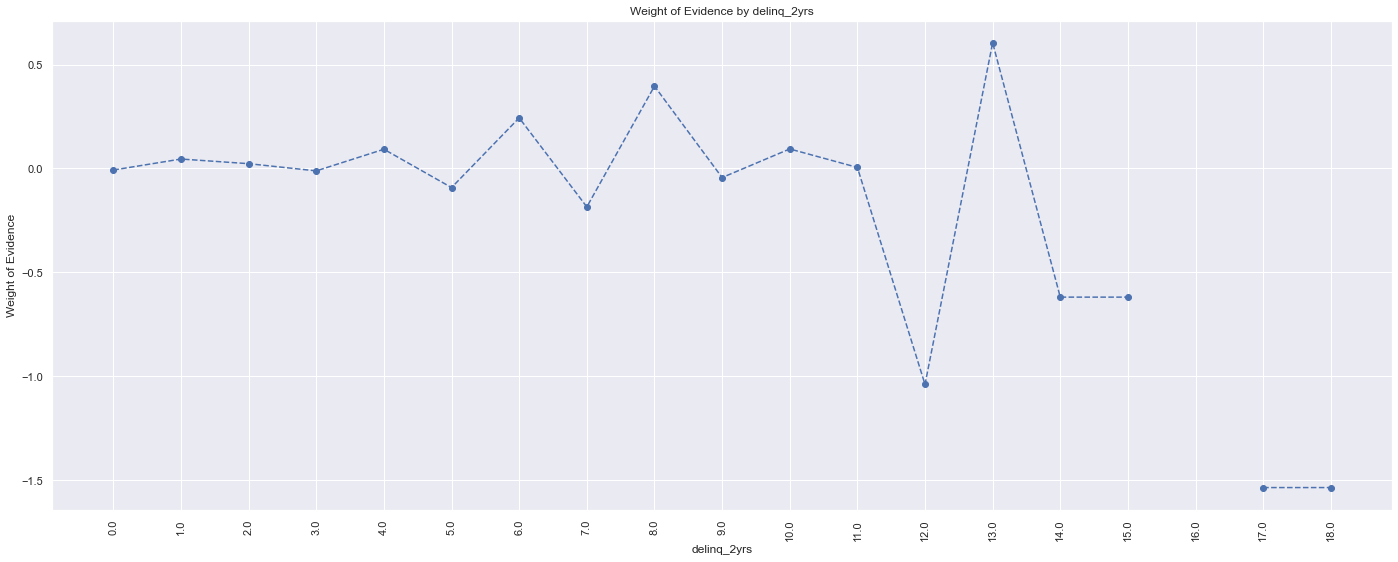

In [125]:
# visualize the weight of evidence by "delinq_2yrs"
plot_woe(df_temp, 'delinq_2yrs', 'WoE', 90)

In [126]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [127]:
# print the unique value of the "delinq_2yrs" variable
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [128]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['inq_last_6mths_factor'] = pd.cut(df_inputs_prepr['inq_last_6mths'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


inq_last_6mths   n_obs  prop_good  obs_prop    n_good    n_bad  \
0              0.0  193232   0.919511  0.518009  177679.0  15553.0   
1              1.0  104163   0.897804  0.279236   93518.0  10645.0   
2              2.0   46214   0.877786  0.123889   40566.0   5648.0   
3              3.0   20040   0.853543  0.053723   17105.0   2935.0   
4              4.0    5810   0.861790  0.015575    5007.0    803.0   
5              5.0    2217   0.839874  0.005943    1862.0    355.0   
6              6.0     977   0.803480  0.002619     785.0    192.0   
7              7.0     159   0.679245  0.000426     108.0     51.0   
8              8.0     101   0.643564  0.000271      65.0     36.0   
9              9.0      43   0.674419  0.000115      29.0     14.0   
10            10.0      17   0.882353  0.000046      15.0      2.0   
11            11.0       8   0.625000  0.000021       5.0      3.0   
12            12.0      12   0.500000  0.000032       6.0      6.0   
13            13.0       5   0.800000  0.000013       4.0      1.0   
14            14.0       5   0.200000  0.000013       1.0      4.0   
15            15.0       9   0.444444  0.000024       4.0      5.0   
16            16.0       3   1.000000  0.000008       3.0      0.0   
17            17.0       2   0.500000  0.000005       1.0      1.0   
18            18.0       2   0.500000  0.000005       1.0      1.0   
19            19.0       1   1.000000  0.000003       1.0      0.0   
20            20.0       1   0.000000  0.000003       0.0      1.0   
21            24.0       1   1.000000  0.000003       1.0      0.0   
22            25.0       1   0.000000  0.000003       0.0      1.0   
23            27.0       1   1.000000  0.000003       1.0      0.0   
24            28.0       1   1.000000  0.000003       1.0      0.0   
25            31.0       1   1.000000  0.000003       1.0      0.0   
26            32.0       1   0.000000  0.000003       0.0      1.0   
27            33.0       1   0.000000  0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0      0.527599    0.428942  0.207015             NaN       NaN         inf  
1      0.277692    0.293582 -0.055646        0.021707  0.262661         inf  
2      0.120456    0.155768 -0.257081        0.020018  0.201435         inf  
3      0.050791    0.080945 -0.466046        0.024243  0.208965         inf  
4      0.014868    0.022146 -0.398472        0.008247  0.067574         inf  
5      0.005529    0.009791 -0.571421        0.021916  0.172949         inf  
6      0.002331    0.005295 -0.820521        0.036394  0.249100         inf  
7      0.000321    0.001407 -1.478404        0.124235  0.657883         inf  
8      0.000193    0.000993 -1.637841        0.035681  0.159437         inf  
9      0.000086    0.000386 -1.500471        0.030854  0.137370         inf  
10     0.000045    0.000055 -0.213807        0.207934  1.286665         inf  
11     0.000015    0.000083 -1.717884        0.257353  1.504077         inf  
12     0.000018    0.000165 -2.228710        0.125000  0.510826         inf  
13     0.000012    0.000028 -0.842415        0.300000  1.386294         inf  
14     0.000003    0.000110 -3.615004        0.600000  2.772589         inf  
15     0.000012    0.000138 -2.451853        0.244444  1.163151         inf  
16     0.000009    0.000000       inf        0.555556       inf         inf  
17     0.000003    0.000028 -2.228710        0.500000       inf         inf  
18     0.000003    0.000028 -2.228710        0.000000  0.000000         inf  
19     0.000003    0.000000       inf        0.500000       inf         inf  
20     0.000000    0.000028      -inf        1.000000       inf         inf  
21     0.000003    0.000000       inf        1.000000       inf         inf  
22     0.000000    0.000028      -inf        1.000000       inf         inf  
23     0.000003    0.000000       inf        1.000000       inf         inf  
24     0.000003    0.00

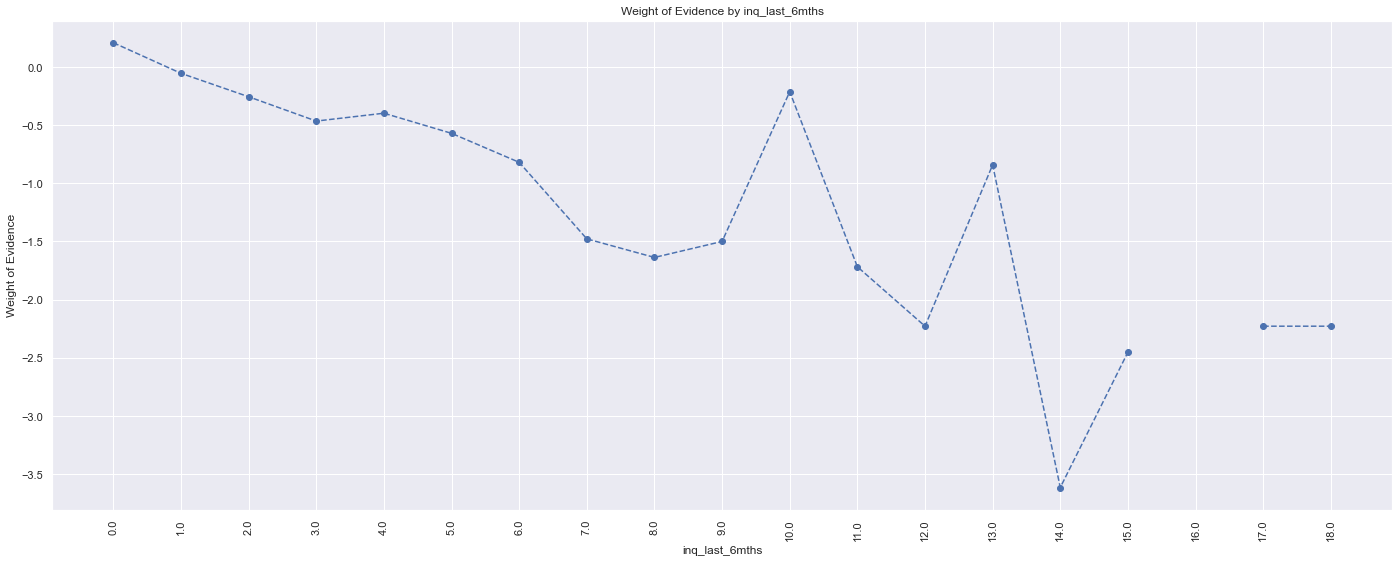

In [129]:
# visualize the weight of evidence by "delinq_2yrs"
plot_woe(df_temp, 'inq_last_6mths', 'WoE', 90)

In [130]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths: 0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths: 1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths: 3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths: > 6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [131]:
# print the unique value of the "open_acc" variable
df_inputs_prepr['open_acc'].unique()

array([20., 15.,  9., 14.,  5., 13., 11.,  6., 10.,  7., 16.,  4.,  8.,
       12., 17.,  3., 18., 26., 24.,  2., 19., 25., 27., 30., 23., 22.,
       21.,  1., 29., 33., 28., 34.,  0., 41., 38., 32., 37., 31., 42.,
       40., 45., 46., 35., 36., 39., 44., 43., 49., 50., 53., 47., 48.,
       55., 51., 54., 62., 76., 84., 58., 52., 75.])

In [132]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  n_obs  prop_good  obs_prop   n_good   n_bad  prop_n_good  \
0        0.0     29   0.793103  0.000078     23.0     6.0     0.000068   
1        1.0    110   0.872727  0.000295     96.0    14.0     0.000285   
2        2.0   1456   0.852335  0.003903   1241.0   215.0     0.003685   
3        3.0   4378   0.881910  0.011736   3861.0   517.0     0.011465   
4        4.0  10028   0.898783  0.026883   9013.0  1015.0     0.026763   
5        5.0  17141   0.901056  0.045951  15445.0  1696.0     0.045862   
6        6.0  24621   0.902157  0.066003  22212.0  2409.0     0.065956   
7        7.0  30169   0.902715  0.080876  27234.0  2935.0     0.080868   
8        8.0  33579   0.902201  0.090017  30295.0  3284.0     0.089958   
9        9.0  35251   0.901336  0.094500  31773.0  3478.0     0.094347   
10      10.0  33936   0.903200  0.090974  30651.0  3285.0     0.091015   
11      11.0  31372   0.898508  0.084101  28188.0  3184.0     0.083701   
12      12.0  27699   0.901946  0.074254  24983.0  2716.0     0.074184   
13      13.0  23892   0.906998  0.064049  21670.0  2222.0     0.064347   
14      14.0  19770   0.902529  0.052999  17843.0  1927.0     0.052983   
15      15.0  16228   0.905719  0.043503  14698.0  1530.0     0.043644   
16      16.0  13540   0.907607  0.036298  12289.0  1251.0     0.036491   
17      17.0  10712   0.905807  0.028716   9703.0  1009.0     0.028812   
18      18.0   8606   0.908785  0.023071   7821.0   785.0     0.023224   
19      19.0   6836   0.903745  0.018326   6178.0   658.0     0.018345   
20      20.0   5224   0.908691  0.014004   4747.0   477.0     0.014096   
21      21.0   4242   0.909712  0.011372   3859.0   383.0     0.011459   
22      22.0   3313   0.907637  0.008881   3007.0   306.0     0.008929   
23      23.0   2530   0.914625  0.006782   2314.0   216.0     0.006871   
24      24.0   1979   0.910056  0.005305   1801.0   178.0     0.005348   
25      25.0   1542   0.902724  0.004134   1392.0   150.0     0.004133   
26      26.0   1064   0.916353  0.002852    975.0    89.0     0.002895   
27      27.0    863   0.915411  0.002313    790.0    73.0     0.002346   
28      28.0    613   0.928222  0.001643    569.0    44.0     0.001690   
29      29.0    496   0.897177  0.001330    445.0    51.0     0.001321   
30      30.0    377   0.907162  0.001011    342.0    35.0     0.001016   
31      31.0    285   0.919298  0.000764    262.0    23.0     0.000778   
32      32.0    234   0.923077  0.000627    216.0    18.0     0.000641   
33      33.0    175   0.897143  0.000469    157.0    18.0     0.000466   
34      34.0    145   0.924138  0.000389    134.0    11.0     0.000398   
35      35.0    124   0.935484  0.000332    116.0     8.0     0.000344   
36      36.0    104   0.884615  0.000279     92.0    12.0     0.000273   
37      37.0     79   0.911392  0.000212     72.0     7.0     0.000214   
38      38.0     64   0.890625  0.000172     57.0     7.0     0.000169   
39      39.0     55   0.945455  0.000147     52.0     3.0     0.000154   
40      40.0     30   0.933333  0.000080     28.0     2.0     0.000083   
41      41.0     30   0.866667  0.000080     26.0     4.0     0.000077   
42      42.0     22   0.954545  0.000059     21.0     1.0     0.000062   
43      43.0     15   0.800000  0.000040     12.0     3.0     0.000036   
44      44.0     12   0.916667  0.000032     11.0     1.0     0.000033   
45      45.0     14   0.928571  0.000038     13.0     1.0     0.000039   
46      46.0      5   1.000000  0.000013      5.0     0.0     0.000015   
47      47.0      6   0.833333  0.000016      5.0     1.0     0.000015   
48      48.0      4   1.000000  0.000011      4.0     0.0     0.000012   
49      49.0      6   1.000000  0.000016      6.0     0.0     0.000018   
50      50.0      4   1.000000  0.000011      4.0     0.0     0.000012   
51      51.0      5   1.000000  0.000013      5.0     0.0     0.000015   
52      52.0      1   1.000000  0.000003      1.0     0.0     0.000003   
53      

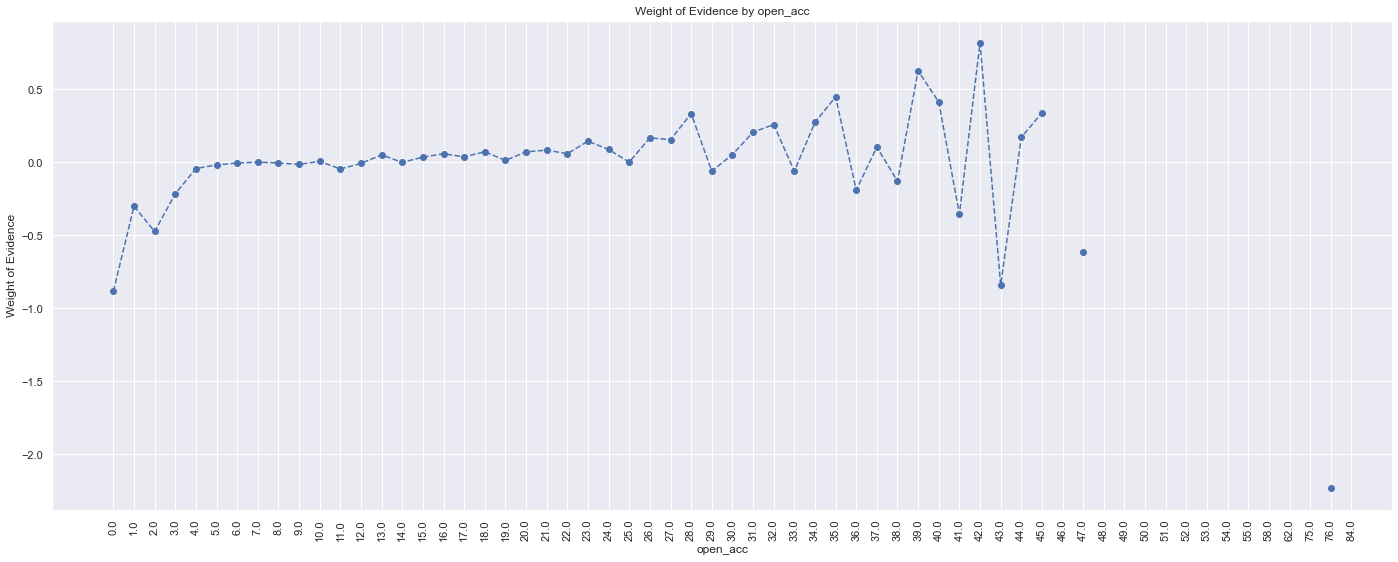

In [133]:
# visualize the weight of evidence by "open_acc"
plot_woe(df_temp, 'open_acc', 'WoE', 90)

In [134]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [135]:
# print the unique value of the "pub_rec" variable
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  9., 10., 13.,  8., 19.,
       11., 17., 34., 16., 12., 40., 18., 54., 15., 63., 21.])

In [136]:
# the next variable to deal with is the "pub_rec" variable 
# let's split the variable into 50 categories
# df_inputs_prepr['pub_rec_factor'] = pd.cut(df_inputs_prepr['pub_rec'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec   n_obs  prop_good  obs_prop    n_good    n_bad  prop_n_good  \
0       0.0  323999   0.901666  0.868565  292139.0  31860.0     0.867476   
1       1.0   42381   0.908332  0.113613   38496.0   3885.0     0.114310   
2       2.0    4527   0.915617  0.012136    4145.0    382.0     0.012308   
3       3.0    1280   0.938281  0.003431    1201.0     79.0     0.003566   
4       4.0     408   0.936275  0.001094     382.0     26.0     0.001134   
5       5.0     203   0.926108  0.000544     188.0     15.0     0.000558   
6       6.0     117   0.931624  0.000314     109.0      8.0     0.000324   
7       7.0      48   0.958333  0.000129      46.0      2.0     0.000137   
8       8.0      24   1.000000  0.000064      24.0      0.0     0.000071   
9       9.0      14   0.857143  0.000038      12.0      2.0     0.000036   
10     10.0      10   1.000000  0.000027      10.0      0.0     0.000030   
11     11.0       3   1.000000  0.000008       3.0      0.0     0.000009   
12     12.0       1   1.000000  0.000003       1.0      0.0     0.000003   
13     13.0       2   1.000000  0.000005       2.0      0.0     0.000006   
14     15.0       1   1.000000  0.000003       1.0      0.0     0.000003   
15     16.0       1   1.000000  0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000  0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000  0.000005       2.0      0.0     0.000006   
18     19.0       1   1.000000  0.000003       1.0      0.0     0.000003   
19     21.0       1   1.000000  0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000  0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000  0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000  0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000  0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0     0.878678 -0.012831             NaN       NaN         inf  
1     0.107146  0.064722        0.006665  0.077553         inf  
2     0.010535  0.155528        0.007286  0.090806         inf  
3     0.002179  0.492752        0.022664  0.337225         inf  
4     0.000717  0.458614        0.002007  0.034138         inf  
5     0.000414  0.299682        0.010166  0.158932         inf  
6     0.000221  0.383197        0.005516  0.083515         inf  
7     0.000055  0.906785        0.026709  0.523588         inf  
8     0.000000       inf        0.041667       inf         inf  
9     0.000055 -0.436950        0.142857       inf         inf  
10    0.000000       inf        0.142857       inf         inf  
11    0.000000       inf        0.000000       NaN         inf  
12    0.000000       inf        0.000000       NaN         inf  
13    0.000000       inf        0.000000       NaN         inf  
14    0.000000       inf        0.000000       NaN         inf  
15    0.000000       inf        0.000000       NaN         inf  
16    0.000000       inf        0.000000       NaN         inf  
17    0.000000       inf        0.000000       NaN         inf  
18    0.000000       inf        0.000000       NaN         inf  
19    0.000000       inf        0.000000       NaN         inf  
20    0.000000       inf        0.000000       NaN         inf  
21    0.000000       inf        0.000000       NaN         inf  
22    0.000000       inf        0.000000       NaN         inf  
23    0.000000       inf        0.000000       NaN         inf

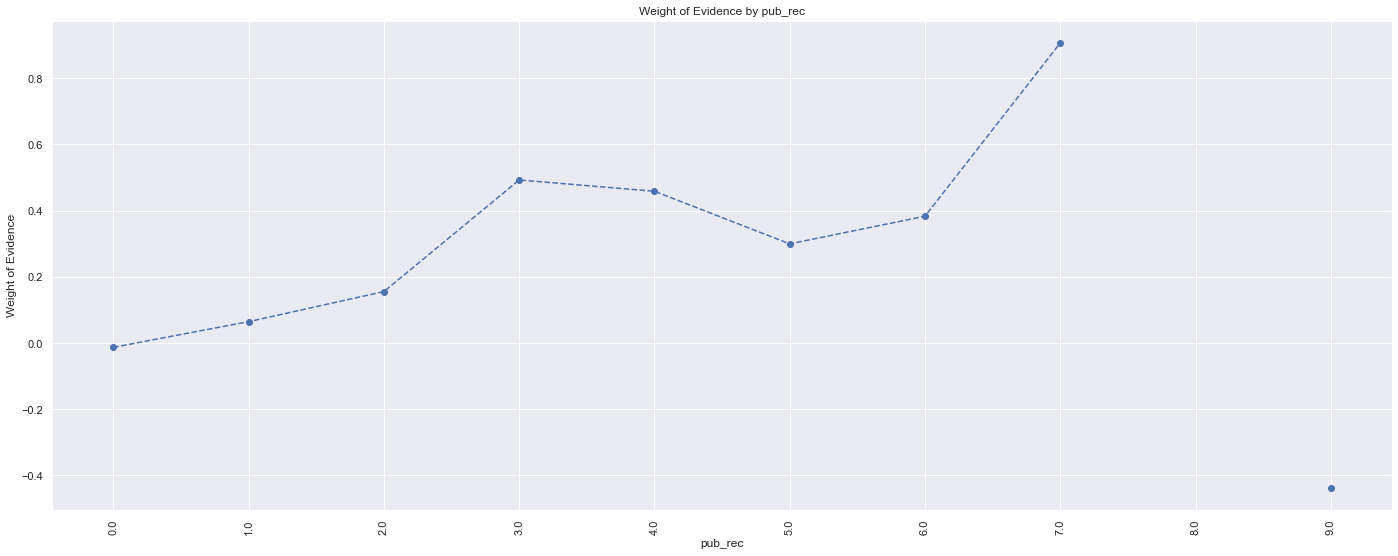

In [137]:
# visualize the weight of evidence by "pub_rec"
plot_woe(df_temp, 'pub_rec', 'WoE', 90)

In [138]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [139]:
# print the unique value of the "total_acc" variable
df_inputs_prepr['total_acc'].unique()

array([ 32.,  38.,  20.,  13.,  30.,  26.,   6.,  21.,  36.,  48.,  25.,
        33.,  27.,  23.,  44.,   9.,  10.,  18.,  31.,   5.,  19.,  15.,
        39.,  12.,  57.,  24.,  22.,  17.,  16.,  42.,   7.,  29.,  28.,
        34.,  43.,  63.,  14.,  11.,  40.,  37.,  41.,  45.,  35.,  49.,
        54.,  52.,  53.,  60.,  56.,   4.,   8.,  47.,  51.,  46.,  61.,
        59.,  50.,  58.,   0.,  64.,   3.,  55.,  62.,   2.,   1.,  71.,
       105.,  66.,  68.,  69.,  67.,  80.,  70.,  65.,  75.,  85.,  93.,
        83.,  73.,  78.,  81.,  74.,  84.,  77.,  89.,  87.,  72.,  76.,
       117.,  90.,  95.,  79.,  91., 121., 119., 100., 118.,  86., 102.,
        82.,  96.,  92., 116.,  94.,  98.,  88., 150., 106., 124.,  97.,
       101.,  99.])

In [140]:
# the next variable to deal with is the "delinq_2yrs" variable 
# let's split the variable into 50 categories
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

# remove all rows with duplicate indices from the "df_inputs_prepr" and "df_targets_prepr" dataframes
# df_inputs_prepr = df_inputs_prepr[~df_inputs_prepr.index.duplicated()]
# df_targets_prepr = df_targets_prepr[~df_targets_prepr.index.duplicated()]
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  n_obs  prop_good  obs_prop   n_good   n_bad  prop_n_good  \
0      (-0.15, 3.0]    459   0.819172  0.001230    376.0    83.0     0.001116   
1        (3.0, 6.0]   6004   0.871419  0.016095   5232.0   772.0     0.015536   
2        (6.0, 9.0]  15047   0.884096  0.040337  13303.0  1744.0     0.039502   
3       (9.0, 12.0]  25169   0.893043  0.067472  22477.0  2692.0     0.066743   
4      (12.0, 15.0]  33651   0.894386  0.090210  30097.0  3554.0     0.089370   
5      (15.0, 18.0]  38711   0.900183  0.103775  34847.0  3864.0     0.103474   
6      (18.0, 21.0]  40599   0.898470  0.108836  36477.0  4122.0     0.108315   
7      (21.0, 24.0]  40163   0.903717  0.107668  36296.0  3867.0     0.107777   
8      (24.0, 27.0]  36286   0.907788  0.097274  32940.0  3346.0     0.097812   
9      (27.0, 30.0]  31775   0.909898  0.085181  28912.0  2863.0     0.085851   
10     (30.0, 33.0]  25900   0.907683  0.069432  23509.0  2391.0     0.069807   
11     (33.0, 36.0]  20748   0.910064  0.055620  18882.0  1866.0     0.056068   
12     (36.0, 39.0]  16055   0.912924  0.043040  14657.0  1398.0     0.043522   
13     (39.0, 42.0]  12134   0.914620  0.032528  11098.0  1036.0     0.032954   
14     (42.0, 45.0]   9107   0.908752  0.024414   8276.0   831.0     0.024575   
15     (45.0, 48.0]   6494   0.906837  0.017409   5889.0   605.0     0.017487   
16     (48.0, 51.0]   4551   0.914964  0.012200   4164.0   387.0     0.012365   
17     (51.0, 54.0]   3260   0.922393  0.008739   3007.0   253.0     0.008929   
18     (54.0, 57.0]   2146   0.916123  0.005753   1966.0   180.0     0.005838   
19     (57.0, 60.0]   1605   0.906542  0.004303   1455.0   150.0     0.004320   
20     (60.0, 63.0]   2164   0.911738  0.005801   1973.0   191.0     0.005859   
21     (63.0, 66.0]    317   0.927445  0.000850    294.0    23.0     0.000873   
22     (66.0, 69.0]    218   0.944954  0.000584    206.0    12.0     0.000612   
23     (69.0, 72.0]    120   0.950000  0.000322    114.0     6.0     0.000339   
24     (72.0, 75.0]    114   0.938596  0.000306    107.0     7.0     0.000318   
25     (75.0, 78.0]     64   0.906250  0.000172     58.0     6.0     0.000172   
26     (78.0, 81.0]     52   0.942308  0.000139     49.0     3.0     0.000146   
27     (81.0, 84.0]     25   0.920000  0.000067     23.0     2.0     0.000068   
28     (84.0, 87.0]     28   0.964286  0.000075     27.0     1.0     0.000080   
29     (87.0, 90.0]     22   0.909091  0.000059     20.0     2.0     0.000059   
30     (90.0, 93.0]     12   0.916667  0.000032     11.0     1.0     0.000033   
31     (93.0, 96.0]      8   0.875000  0.000021      7.0     1.0     0.000021   
32     (96.0, 99.0]      4   1.000000  0.000011      4.0     0.0     0.000012   
33    (99.0, 102.0]      4   1.000000  0.000011      4.0     0.0     0.000012   
34   (102.0, 105.0]      4   1.000000  0.000011      4.0     0.0     0.000012   
35   (105.0, 108.0]      1   1.000000  0.000003      1.0     0.0     0.000003   
36   (108.0, 111.0]      0        NaN  0.000000      NaN     NaN          NaN   
37   (111.0, 114.0]      0        NaN  0.000000      NaN     NaN          NaN   
38   (114.0, 117.0]      2   1.000000  0.000005      2.0     0.0     0.000006   
39   (117.0, 120.0]      2   1.000000  0.000005      2.0     0.0     0.000006   
40   (120.0, 123.0]      1   1.000000  0.000003      1.0     0.0     0.000003   
41   (123.0, 126.0]      1   1.000000  0.000003      1.0     0.0     0.000003   
42   (126.0, 129.0]      0        NaN  0.000000      NaN     NaN          NaN   
43   (129.0, 132.0]      0        NaN  0.000000      NaN     NaN          NaN   
44   (132.0, 135.0]      0        NaN  0.000000      NaN     NaN          NaN   
45   (135.0, 138.0]      0        NaN  0.000000      NaN     NaN          NaN   
46   (138.0, 141.0]      0        NaN  0.000000      NaN     NaN          NaN   
47   (141.0, 144.0]      0        NaN  0.000000      NaN     NaN          NaN   
48   (144.0, 147.0]      0        

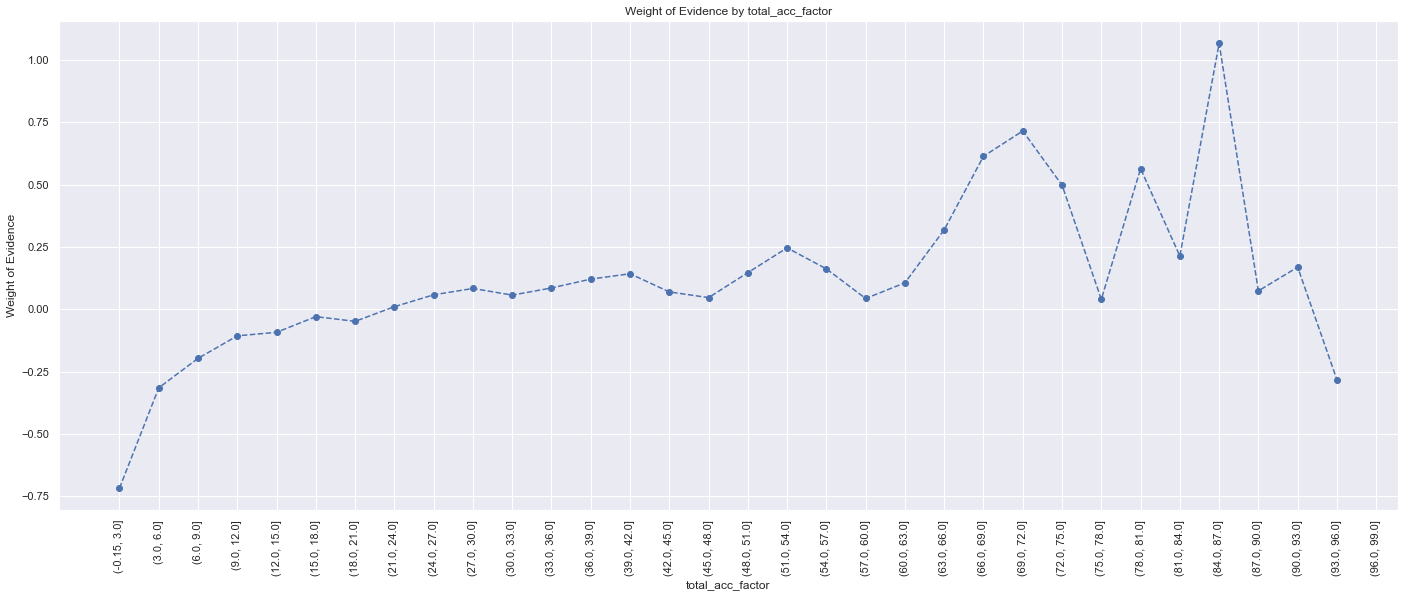

In [141]:
# visualize the weight of evidence by "pub_rec"
plot_woe(df_temp, 'total_acc_factor', 'WoE', 90)

In [142]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [143]:
# print the unique value of the "acc_now_delinq" variable
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [144]:
# calculate the weight of evidence by debt-to-income ratio
df_temp = woe_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq   n_obs  prop_good  obs_prop    n_good    n_bad  \
0             0.0  371682   0.902761  0.996392  335540.0  36142.0   
1             1.0    1263   0.912114  0.003386    1152.0    111.0   
2             2.0      70   0.942857  0.000188      66.0      4.0   
3             3.0       7   0.857143  0.000019       6.0      1.0   
4             4.0       4   1.000000  0.000011       4.0      0.0   
5             5.0       2   0.500000  0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  Info_Value  
0     0.996351    0.996773 -0.000424             NaN       NaN         inf  
1     0.003421    0.003061  0.111015        0.009353  0.111439         inf  
2     0.000196    0.000110  0.574651        0.030743  0.463636         inf  
3     0.000018    0.000028 -0.436950        0.085714  1.011601         inf  
4     0.000012    0.000000       inf        0.142857       inf         inf  
5     0.000003    0.000028 -2.228710        0.500000       inf         inf

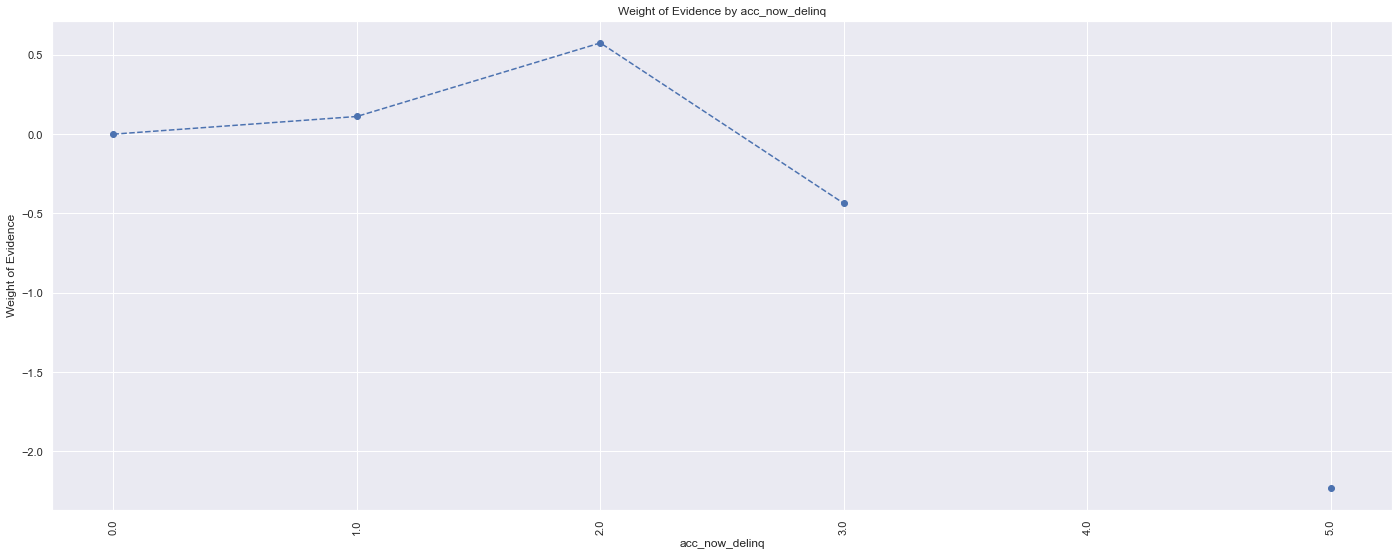

In [145]:
# visualize the weight of evidence by "acc_now_delinq"
plot_woe(df_temp, 'acc_now_delinq', 'WoE', 90)

In [146]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [147]:
# the first interval has the lowest WoE so it will have its own dummy variable
# WoE values from 2.42 to 31.46 change randomly but have a few number of obsevations so will be assigned the same dummy
# intervals starting from  31.46 to 75.02 have apparoximatelty the same WoE and will have the same dummy
# finally, all intervals from that point will have their own dummy variable
# below is the relevant code
df_inputs_prepr['mths_since_last_record_factor: Missing'] = np.where(df_inputs_prepr['mths_since_last_record'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: < 2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: 3-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: 32-75'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 75), 1, 0)
df_inputs_prepr['mths_since_last_record_factor: > 76'] = np.where(df_inputs_prepr['mths_since_last_record'] >= 76, 1, 0)

In [148]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aylan\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor  n_obs  prop_good  obs_prop   n_good   n_bad  \
0            (-9999.999, 5000.0]  19417   0.875212  0.052052  16994.0  2423.0   
1             (5000.0, 9999.999]  52655   0.888007  0.141156  46758.0  5897.0   
2          (9999.999, 14999.998]  59570   0.892127  0.159693  53144.0  6426.0   
3         (14999.998, 19999.998]  51455   0.891128  0.137939  45853.0  5602.0   
4         (19999.998, 24999.997]  41582   0.899091  0.111472  37386.0  4196.0   
5         (24999.997, 29999.997]  32093   0.902969  0.086034  28979.0  3114.0   
6         (29999.997, 34999.996]  24516   0.908672  0.065722  22277.0  2239.0   
7         (34999.996, 39999.996]  19767   0.915313  0.052991  18093.0  1674.0   
8         (39999.996, 44999.996]  14719   0.925199  0.039458  13618.0  1101.0   
9         (44999.996, 49999.995]  11585   0.925248  0.031057  10719.0   866.0   
10        (49999.995, 54999.994]   8964   0.929830  0.024030   8335.0   629.0   
11        (54999.994, 59999.994]   6681   0.937285  0.017910   6262.0   419.0   
12        (59999.994, 64999.994]   5311   0.943137  0.014238   5009.0   302.0   
13        (64999.994, 69999.993]   4305   0.935656  0.011541   4028.0   277.0   
14        (69999.993, 74999.992]   3405   0.940088  0.009128   3201.0   204.0   
15        (74999.992, 79999.992]   2646   0.934618  0.007093   2473.0   173.0   
16        (79999.992, 84999.992]   2196   0.939891  0.005887   2064.0   132.0   
17        (84999.992, 89999.991]   1776   0.938626  0.004761   1667.0   109.0   
18         (89999.991, 94999.99]   1420   0.949296  0.003807   1348.0    72.0   
19          (94999.99, 99999.99]   1178   0.959253  0.003158   1130.0    48.0   
20         (99999.99, 104999.99]   1024   0.953125  0.002745    976.0    48.0   
21       (104999.99, 109999.989]    848   0.951651  0.002273    807.0    41.0   
22      (109999.989, 114999.988]    695   0.952518  0.001863    662.0    33.0   
23      (114999.988, 119999.988]    627   0.948963  0.001681    595.0    32.0   
24      (119999.988, 124999.988]    471   0.951168  0.001263    448.0    23.0   
25      (124999.988, 129999.987]    441   0.936508  0.001182    413.0    28.0   
26      (129999.987, 134999.986]    339   0.961652  0.000909    326.0    13.0   
27      (134999.986, 139999.986]    298   0.963087  0.000799    287.0    11.0   
28      (139999.986, 144999.986]    309   0.974110  0.000828    301.0     8.0   
29      (144999.986, 149999.985]    247   0.951417  0.000662    235.0    12.0   
30      (149999.985, 154999.984]    210   0.928571  0.000563    195.0    15.0   
31      (154999.984, 159999.984]    215   0.976744  0.000576    210.0     5.0   
32      (159999.984, 164999.984]    183   0.956284  0.000491    175.0     8.0   
33      (164999.984, 169999.983]    162   0.969136  0.000434    157.0     5.0   
34      (169999.983, 174999.982]    127   0.921260  0.000340    117.0    10.0   
35      (174999.982, 179999.982]    116   0.939655  0.000311    109.0     7.0   
36      (179999.982, 184999.982]     98   0.989796  0.000263     97.0     1.0   
37      (184999.982, 189999.981]    110   0.972727  0.000295    107.0     3.0   
38       (189999.981, 194999.98]     84   0.952381  0.000225     80.0     4.0   
39        (194999.98, 199999.98]     70   0.928571  0.000188     65.0     5.0   
40        (199999.98, 204999.98]     85   0.976471  0.000228     83.0     2.0   
41       (204999.98, 209999.979]     73   0.945205  0.000196     69.0     4.0   
42      (209999.979, 214999.978]     58   0.982759  0.000155     57.0     1.0   
43      (214999.978, 219999.978]     62   0.935484  0.000166     58.0     4.0   
44      (219999.978, 224999.978]     54   0.925926  0.000145     50.0     4.0   
45      (224999.978, 229999.977]     37   0.945946  0.000099     35.0     2.0   
46      (229999.977, 234999.976]     55   0.927273  0.000147     51.0     4.0   
47      (234999.976, 239999.976]     41   0.951220  0.000110     39.0     2.0   
48      (239999.976, 244999.976]     35 

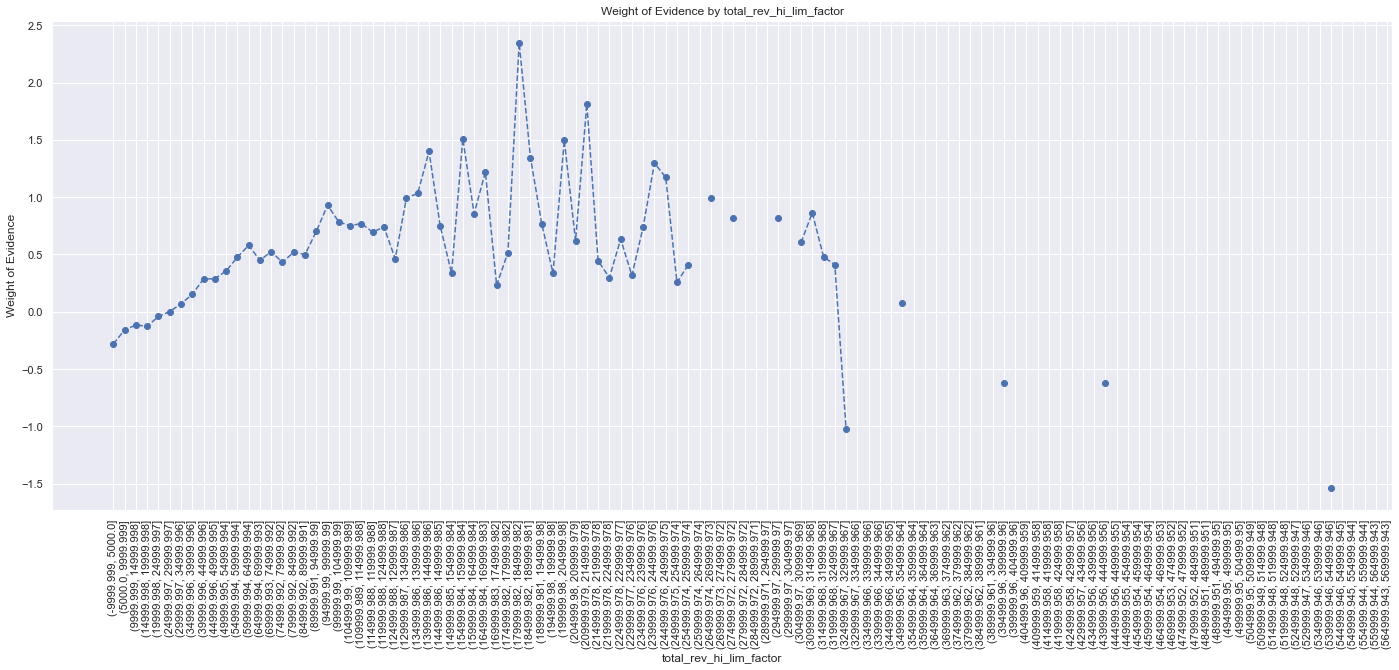

In [149]:
# visualize the weight of evidence by "total_rev_hi_lim"
plot_woe(df_temp, 'total_rev_hi_lim_factor', 'WoE', 90)

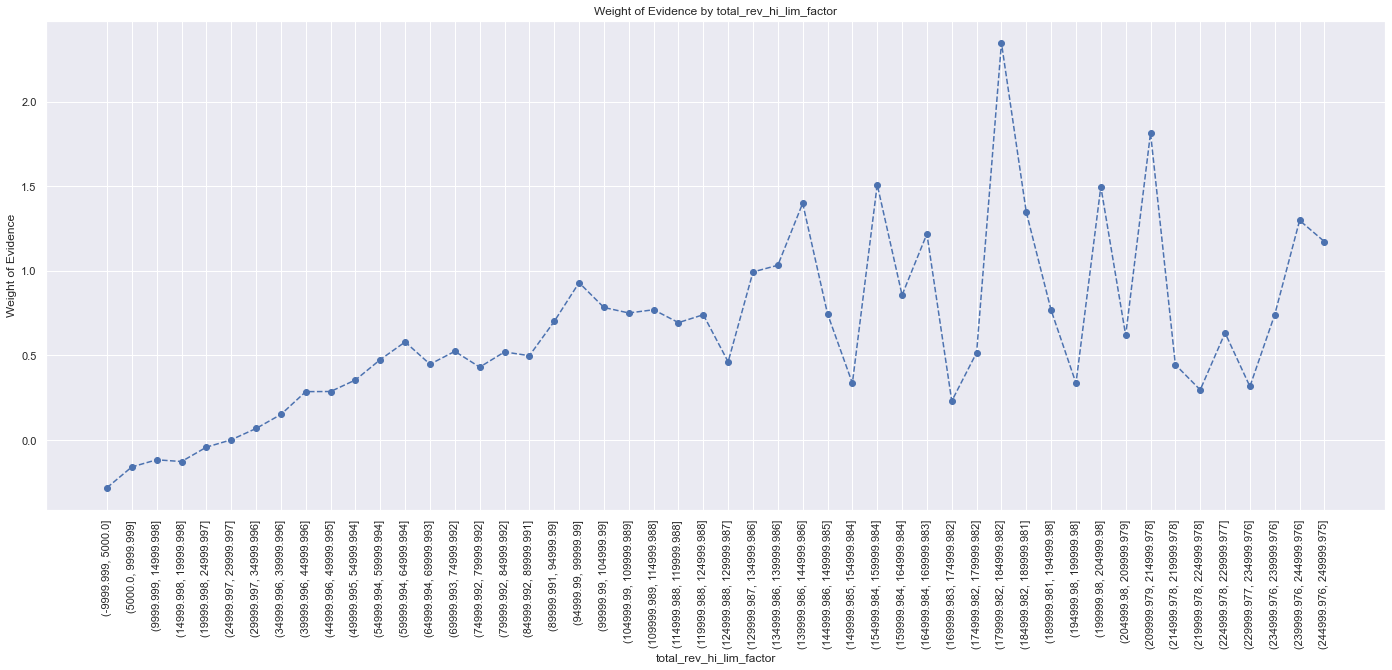

In [150]:
# visualize the weight of evidence by "total_rev_hi_lim"
plot_woe(df_temp.iloc[: 50, : ], 'total_rev_hi_lim_factor', 'WoE', 90)

In [151]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [152]:
# before the preprocessing of dummy variables we assigned the training set to the "df_inputs_prepr" dataframe
# now that the dummies needed are defined we need to assign back the content of this dataframe to the training dataframe
X_train = df_inputs_prepr

In [153]:
# since we had issues the with duplicate indices when calculating the WoE,
# I decided to gather only the relevant code to calculate the dummies for the train part
df_inputs_prepr = X_train
df_targets_prepr = y_train

# then we calculate the dummy variables exactly the same way as we did for the training part 
# let's start with the "home_ownership variable"
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']])

# next variable: "addr_state"
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                 df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

# next variable: purpose
df_inputs_prepr['purpose:educ_smb_wedd_renen_mov_house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth_med_vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                   df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:majorpurch_car_homeimpr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                          df_inputs_prepr['purpose:home_improvement']])

# now let's preprocess the continuous variables
# we start with the "term_int" variable
df_inputs_prepr['term:36'] = np.where(df_inputs_prepr['term_int'] == 36, 1, 0)
df_inputs_prepr['term:60'] = np.where(df_inputs_prepr['term_int'] == 60, 1, 0)

# next variable: "emp_length_int"
df_inputs_prepr['emp_length_int:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length_int:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length_int:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length_int:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length_int:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length_int:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

# next variable: "mth_issue_date"
df_inputs_prepr['mth_issue_date:<38'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38)), 1, 0)
df_inputs_prepr['mth_issue_date:38-39'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mth_issue_date:40-41'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mth_issue_date:42-48'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mth_issue_date:49-52'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mth_issue_date:53-64'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mth_issue_date:65-84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mth_issue_date:>84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(85, int(df_inputs_prepr['mth_issue_date'].max()))), 1, 0)

# next variable: 
df_inputs_prepr['int_rate: < 9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548 - 12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025 - 15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74 - 20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate: > 20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

# next variable: "annual_inc"
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

# next variable: "mths_since_last_delinq"
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

# next variable: "dti"
df_inputs_prepr['dti: <= 1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti: 1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti: 3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti: 7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti: 10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti: 16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti: 20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti: 21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti: 22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti: > 35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

# next variable: "mths_since_last_record"
df_inputs_prepr['mths_since_last_record: Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record: 0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record: 3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record: 21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record: 32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record: 81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record: > 86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# next variable: "mth_since_earliest_cr_line"
df_inputs_prepr['mth_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mth_since_earliest_cr_line'].max()))), 1, 0)

# next variable: "open_acc"
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

# next variable: "total_acc"
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

# next variable: "acc_now_delinq"
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

# next variable: "pub_rec"
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

# next variable: "inq_last_6mths"
df_inputs_prepr['inq_last_6mths: 0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths: 1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths: 3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths: > 6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

# next variable: "delinq_2yrs"
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

# next variable: "total_rev_hi_lim"
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

# now that the dummies needed are defined we need to assign back the content of this dataframe to the test dataframe
X_train = df_inputs_prepr

##### Preprocessing the test dataset

In [154]:
# in order to test the model in the test set,
# we must have the same dummy variables as the ones in the train set
# note that we can use the same code to create the same dummy variables for a different dataset
# the test dataframe is used only to test and assess a model, estimated on the training data,
# therefore, we do not need to assess WoE or come up with categories
# rather, we must create the exact same dummy variables we used to train the model
# note: the WoE will not be calculated or visualized since it has no influence on the data, so I ignored it in these steps 
# to preprocess the discrete and continuous variables we need to assign the test set to the "df_inputs_prepr" dataframe
df_inputs_prepr = X_test
df_targets_prepr = y_test

# let's make sure there is a dummy for ND (North Dakota) state and set it to 0 when there is a missing value
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
  pass
else:
  df_inputs_prepr['addr_state:ND'] = 0
  
# then we calculate the dummy variables exactly the same way as we did for the training part 
# let's start with the "home_ownership variable"
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']])

# next variable: "addr_state"
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                 df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

# next variable: purpose
df_inputs_prepr['purpose:educ_smb_wedd_renen_mov_house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth_med_vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                   df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:majorpurch_car_homeimpr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                          df_inputs_prepr['purpose:home_improvement']])

# now let's preprocess the continuous variables
# we start with the "term_int" variable
df_inputs_prepr['term:36'] = np.where(df_inputs_prepr['term_int'] == 36, 1, 0)
df_inputs_prepr['term:60'] = np.where(df_inputs_prepr['term_int'] == 60, 1, 0)

# next variable: "emp_length_int"
df_inputs_prepr['emp_length_int:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length_int:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length_int:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length_int:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length_int:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length_int:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

# next variable: "mth_issue_date"
df_inputs_prepr['mth_issue_date:<38'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38)), 1, 0)
df_inputs_prepr['mth_issue_date:38-39'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mth_issue_date:40-41'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mth_issue_date:42-48'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mth_issue_date:49-52'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mth_issue_date:53-64'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mth_issue_date:65-84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mth_issue_date:>84'] = np.where(df_inputs_prepr['mth_issue_date'].isin(range(85, int(df_inputs_prepr['mth_issue_date'].max()))), 1, 0)

# next variable: 
df_inputs_prepr['int_rate: < 9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548 - 12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025 - 15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74 - 20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate: > 20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

# next variable: "annual_inc"
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

# next variable: "mths_since_last_delinq"
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

# next variable: "dti"
df_inputs_prepr['dti: <= 1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti: 1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti: 3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti: 7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti: 10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti: 16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti: 20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti: 21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti: 22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti: > 35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

# next variable: "mths_since_last_record"
df_inputs_prepr['mths_since_last_record: Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record: 0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record: 3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record: 21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record: 32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record: 81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record: > 86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

# next variable: "mth_since_earliest_cr_line"
df_inputs_prepr['mth_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mth_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mth_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mth_since_earliest_cr_line'].max()))), 1, 0)

# next variable: "open_acc"
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

# next variable: "total_acc"
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

# next variable: "acc_now_delinq"
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

# next variable: "pub_rec"
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

# next variable: "inq_last_6mths"
df_inputs_prepr['inq_last_6mths: 0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths: 1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths: 3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths: > 6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

# next variable: "delinq_2yrs"
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

# next variable: "total_rev_hi_lim"
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

# now that the dummies needed are defined we need to assign back the content of this dataframe to the test dataframe
X_test = df_inputs_prepr

In [155]:
# check the shape of each dataframe
print('The shape of the X_train" dataframe is:', X_train.shape)
print('The shape of the "y_train" dataframe is:', y_train.shape)
print('The shape of the "X_test" dataframe is:', X_test.shape)
print('The shape of the "y_test" dataframe is:', y_test.shape)

The shape of the X_train" dataframe is: (373028, 328)
The shape of the "y_train" dataframe is: (373028,)
The shape of the "X_test" dataframe is: (93257, 315)
The shape of the "y_test" dataframe is: (93257,)


In [157]:
# finally let's store all our results in csv files
# we will begin modeling using only these csv files
X_train.to_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_train.csv')
X_test.to_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_test.csv')
y_train.to_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_train.csv')
y_test.to_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_test.csv')